<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Loading-and-Reading-the-data-files" data-toc-modified-id="Loading-and-Reading-the-data-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Reading the data files</a></span><ul class="toc-item"><li><span><a href="#Additive-STL-Decomposition-using-Seasonal_Decompose" data-toc-modified-id="Additive-STL-Decomposition-using-Seasonal_Decompose-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Additive STL Decomposition using Seasonal_Decompose</a></span></li></ul></li><li><span><a href="#For-other-time-series" data-toc-modified-id="For-other-time-series-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>For other time series</a></span><ul class="toc-item"><li><span><a href="#A2-folder---Synthetic-Time-series-data-with-inserted-outliers" data-toc-modified-id="A2-folder---Synthetic-Time-series-data-with-inserted-outliers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>A2 folder - Synthetic Time-series data with inserted outliers</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Loading-and-Reading-the-data-files" data-toc-modified-id="Loading-and-Reading-the-data-files-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Loading and Reading the data files</a></span><ul class="toc-item"><li><span><a href="#A1-Folder---real-Yahoo-server-traffic-dataset" data-toc-modified-id="A1-Folder---real-Yahoo-server-traffic-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>A1 Folder - real Yahoo server traffic dataset</a></span></li><li><span><a href="#A3-Folder---Synthetic-data-with-outliers-specified" data-toc-modified-id="A3-Folder---Synthetic-data-with-outliers-specified-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>A3 Folder - Synthetic data with outliers specified</a></span></li><li><span><a href="#A4-Folder---Synthetic-data-with-outliers,-changepoints-and-seasonalities." data-toc-modified-id="A4-Folder---Synthetic-data-with-outliers,-changepoints-and-seasonalities.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>A4 Folder - Synthetic data with outliers, changepoints and seasonalities.</a></span></li></ul></li><li><span><a href="#Extracting-useful-features-from-Time-Series" data-toc-modified-id="Extracting-useful-features-from-Time-Series-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extracting useful features from Time-Series</a></span></li></ul></div>

# Imports

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import os
from statsmodels.tsa.seasonal import seasonal_decompose
import glob
from datetime import datetime

# Loading and Reading the data files

In [5]:
start_time = datetime.now()
all_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/**/*.csv', recursive=True)
end_time = datetime.now()
print(f'Loaded the paths of {len(all_csv)} files from disk. Took {end_time-start_time}')

Loaded the paths of 100 files from disk. Took 0:00:00.002948


In [6]:
all_csv[0]

'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\\synthetic_1.csv'

In [7]:
all_csv[0].split("/")[5].replace('\\','').split(".")[0]

'A2Benchmarksynthetic_1'

In [8]:
df= pd.read_csv(all_csv[0])
df

timestamp       value  is_anomaly
0     1416726000   13.894031           0
1     1416729600   33.578274           0
2     1416733200   88.933746           0
3     1416736800  125.389424           0
4     1416740400  152.962000           0
...          ...         ...         ...
1416  1421823600 -141.419766           0
1417  1421827200 -139.657834           0
1418  1421830800  -70.550652           0
1419  1421834400  -16.857148           0
1420  1421838000    7.757660           0

[1421 rows x 3 columns]

In [9]:
df.describe()

timestamp        value   is_anomaly
count  1.421000e+03  1421.000000  1421.000000
mean   1.419282e+09     6.368346     0.002815
std    1.477266e+06   987.768206     0.053000
min    1.416726e+09 -1421.039008     0.000000
25%    1.418004e+09  -976.854162     0.000000
50%    1.419282e+09    12.969502     0.000000
75%    1.420560e+09   989.025992     0.000000
max    1.421838e+09  1416.912543     1.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   1421 non-null   int64  
 1   value       1421 non-null   float64
 2   is_anomaly  1421 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.4 KB


Now we change the timestamp colump from unix seconds after epoch to a human readable date-time stamp   

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds

In [12]:
df

timestamp       value  is_anomaly
0    2014-11-23 07:00:00   13.894031           0
1    2014-11-23 08:00:00   33.578274           0
2    2014-11-23 09:00:00   88.933746           0
3    2014-11-23 10:00:00  125.389424           0
4    2014-11-23 11:00:00  152.962000           0
...                  ...         ...         ...
1416 2015-01-21 07:00:00 -141.419766           0
1417 2015-01-21 08:00:00 -139.657834           0
1418 2015-01-21 09:00:00  -70.550652           0
1419 2015-01-21 10:00:00  -16.857148           0
1420 2015-01-21 11:00:00    7.757660           0

[1421 rows x 3 columns]

In [13]:
df_indexed = df.set_index('timestamp')

print(df_indexed.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1421 entries, 2014-11-23 07:00:00 to 2015-01-21 11:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       1421 non-null   float64
 1   is_anomaly  1421 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 33.3 KB
None


## Additive STL Decomposition using Seasonal_Decompose 

These series have the presence of 0 or negative values, which would make them unsuitable for multiplicative decomposition wiout some sort of preprocessing or normalization.

In [14]:
# Additive Decomposition
result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')

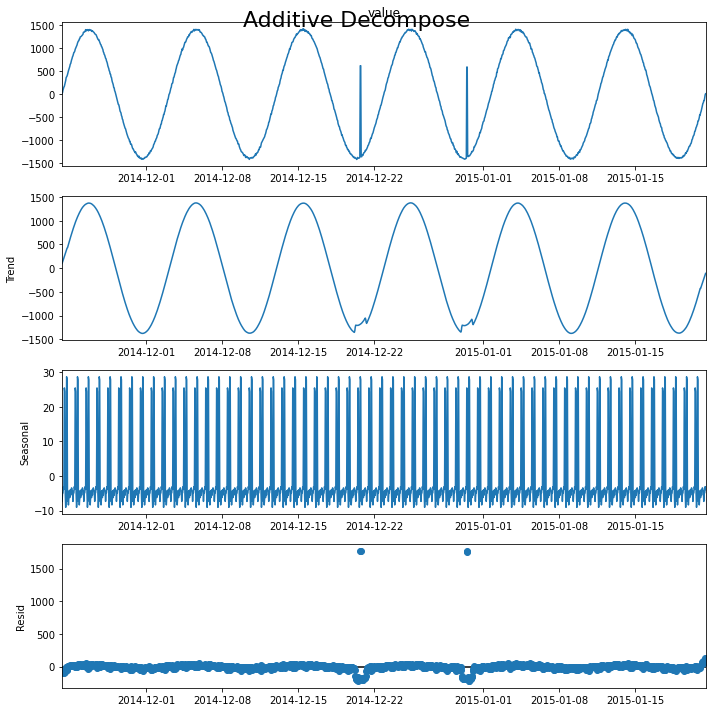

In [15]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [16]:
threshold=500
residualdf = result_add.resid
outliers = residualdf[residualdf > threshold]
print(f"File: {all_csv[0]}")
print("threshold: 500")
print("Outliers:")
print(outliers)

File: ../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_1.csv
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1772.222450
2014-12-20 18:00:00    1766.344219
2014-12-30 12:00:00    1760.350798
2014-12-30 13:00:00    1755.882094
Name: resid, dtype: float64


In [17]:
outliers = residualdf[residualdf > threshold]
not_outliers = residualdf[residualdf < threshold]
print(outliers,not_outliers)

timestamp
2014-12-20 17:00:00    1772.222450
2014-12-20 18:00:00    1766.344219
2014-12-30 12:00:00    1760.350798
2014-12-30 13:00:00    1755.882094
Name: resid, dtype: float64 timestamp
2014-11-23 07:00:00    -77.726068
2014-11-23 08:00:00    -89.931661
2014-11-23 09:00:00    -63.993065
2014-11-23 10:00:00    -58.757070
2014-11-23 11:00:00    -59.813391
                          ...    
2015-01-21 07:00:00     92.011122
2015-01-21 08:00:00     62.403172
2015-01-21 09:00:00    102.613431
2015-01-21 10:00:00    125.607205
2015-01-21 11:00:00    122.113068
Name: resid, Length: 1417, dtype: float64


In [18]:
anomalies = df_indexed.join(outliers,on='timestamp',how='inner')
not_anomalies = df_indexed.join(not_outliers,on='timestamp',how='inner')
print(anomalies,not_anomalies)

                          value  is_anomaly        resid
timestamp                                               
2014-12-20 17:00:00  616.412915           1  1772.222450
2014-12-20 18:00:00  616.412915           1  1766.344219
2014-12-30 12:00:00  587.893627           1  1760.350798
2014-12-30 13:00:00  587.893627           1  1755.882094                           value  is_anomaly       resid
timestamp                                              
2014-11-23 07:00:00   13.894031           0  -77.726068
2014-11-23 08:00:00   33.578274           0  -89.931661
2014-11-23 09:00:00   88.933746           0  -63.993065
2014-11-23 10:00:00  125.389424           0  -58.757070
2014-11-23 11:00:00  152.962000           0  -59.813391
...                         ...         ...         ...
2015-01-21 07:00:00 -141.419766           0   92.011122
2015-01-21 08:00:00 -139.657834           0   62.403172
2015-01-21 09:00:00  -70.550652           0  102.613431
2015-01-21 10:00:00  -16.857148           

In [19]:
p = df_indexed.loc[df_indexed['is_anomaly'] == 1]

n = df_indexed.loc[df_indexed['is_anomaly'] == 0]

In [20]:
print(p,n)

                          value  is_anomaly
timestamp                                  
2014-12-20 17:00:00  616.412915           1
2014-12-20 18:00:00  616.412915           1
2014-12-30 12:00:00  587.893627           1
2014-12-30 13:00:00  587.893627           1                           value  is_anomaly
timestamp                                  
2014-11-23 07:00:00   13.894031           0
2014-11-23 08:00:00   33.578274           0
2014-11-23 09:00:00   88.933746           0
2014-11-23 10:00:00  125.389424           0
2014-11-23 11:00:00  152.962000           0
...                         ...         ...
2015-01-21 07:00:00 -141.419766           0
2015-01-21 08:00:00 -139.657834           0
2015-01-21 09:00:00  -70.550652           0
2015-01-21 10:00:00  -16.857148           0
2015-01-21 11:00:00    7.757660           0

[1417 rows x 2 columns]


In [21]:
truepositives = anomalies.loc[anomalies['is_anomaly'] == 1]

falsepositives = anomalies.loc[anomalies['is_anomaly'] == 0]

In [22]:
print(truepositives,falsepositives,sep="\n")

                          value  is_anomaly        resid
timestamp                                               
2014-12-20 17:00:00  616.412915           1  1772.222450
2014-12-20 18:00:00  616.412915           1  1766.344219
2014-12-30 12:00:00  587.893627           1  1760.350798
2014-12-30 13:00:00  587.893627           1  1755.882094
Empty DataFrame
Columns: [value, is_anomaly, resid]
Index: []


In [23]:
truenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 0]

falsenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 1]

In [24]:
print(truenegatives,falsenegatives,sep="\n")

                          value  is_anomaly       resid
timestamp                                              
2014-11-23 07:00:00   13.894031           0  -77.726068
2014-11-23 08:00:00   33.578274           0  -89.931661
2014-11-23 09:00:00   88.933746           0  -63.993065
2014-11-23 10:00:00  125.389424           0  -58.757070
2014-11-23 11:00:00  152.962000           0  -59.813391
...                         ...         ...         ...
2015-01-21 07:00:00 -141.419766           0   92.011122
2015-01-21 08:00:00 -139.657834           0   62.403172
2015-01-21 09:00:00  -70.550652           0  102.613431
2015-01-21 10:00:00  -16.857148           0  125.607205
2015-01-21 11:00:00    7.757660           0  122.113068

[1417 rows x 3 columns]
Empty DataFrame
Columns: [value, is_anomaly, resid]
Index: []


In [25]:
#Traditional FPR and TPR formmulae
#tpr = truepositives.count()/(truepositives.count() + falsenegatives.count())
#fpr = falsepositives.count()/(falsepositives.count() + truenegatives.count())

#IDEAL Paper based TRP/FPR rates
fpr = len(falsepositives)/len(n)
tpr = len(truepositives)/len(p)
fnr = 1-tpr
tnr = 1-fpr

In [26]:
print(fpr,tpr,fnr,tnr,sep = "\n")

0.0
1.0
0.0
1.0


In [27]:
precision = len(truepositives)/(tpr + fpr)
recall = tpr/(tpr + fnr)

In [28]:
print(precision,recall,sep="\n")

4.0
1.0


In [29]:
f1 = 2 * ((precision * recall)/(precision + recall))

In [30]:
print(f1)

1.6


Note that the presence of negative and zero values make it such that multiplicative decomposition is not applicable for these time series.

# For other time series

Now Let's try doing this for all the other 99 time series in a loop

## A2 folder - Synthetic Time-series data with inserted outliers

Processing index: 0 of 100



A2Benchmark_A2Benchmarksynthetic_1add_STL


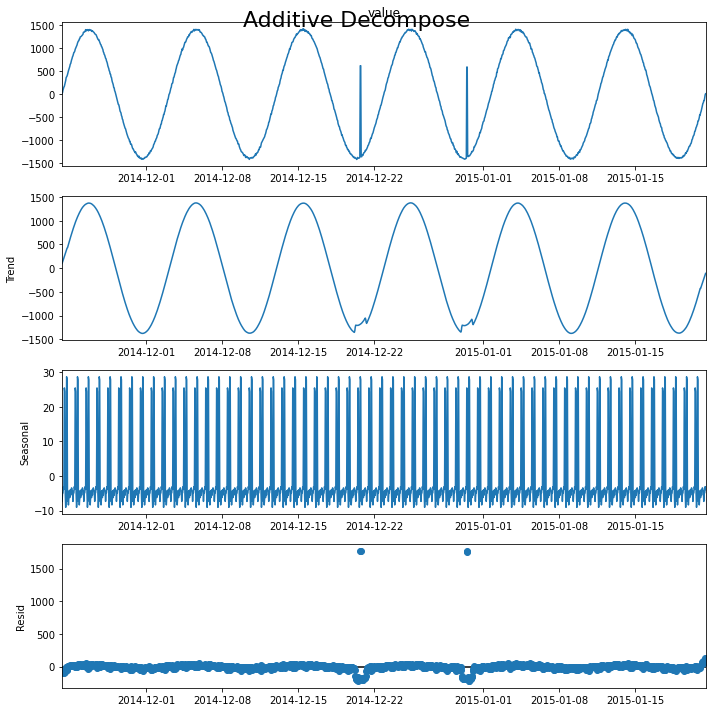



File: A2Benchmarksynthetic_1
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1772.222450
2014-12-20 18:00:00    1766.344219
2014-12-30 12:00:00    1760.350798
2014-12-30 13:00:00    1755.882094
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_10add_STL


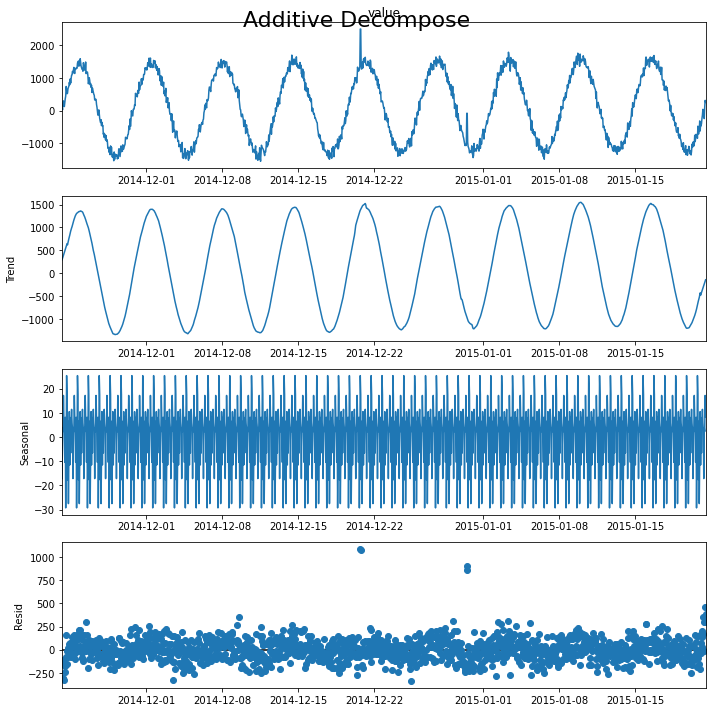



File: A2Benchmarksynthetic_10
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1088.668787
2014-12-20 18:00:00    1077.463440
2014-12-30 12:00:00     861.051098
2014-12-30 13:00:00     900.266830
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_100add_STL


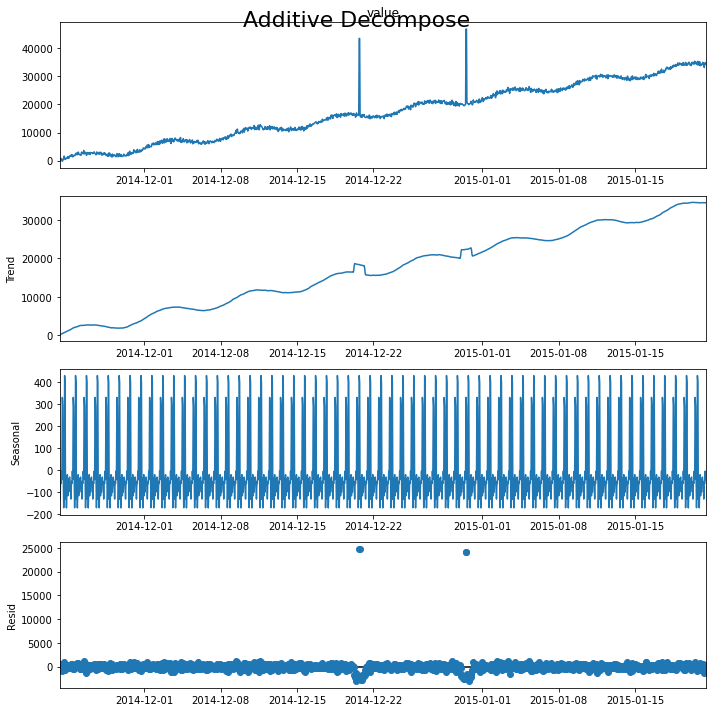



File: A2Benchmarksynthetic_100
threshold: 500
Outliers:
timestamp
2014-11-23 07:00:00     510.047397
2014-11-23 16:00:00    1023.235688
2014-11-24 09:00:00     525.001815
2014-11-24 19:00:00     564.290616
2014-11-24 21:00:00     714.436649
                          ...     
2015-01-19 22:00:00     698.636921
2015-01-20 11:00:00     888.408219
2015-01-20 14:00:00     565.266072
2015-01-20 22:00:00     825.323223
2015-01-21 05:00:00     574.096495
Name: resid, Length: 172, dtype: float64



A2Benchmark_A2Benchmarksynthetic_11add_STL


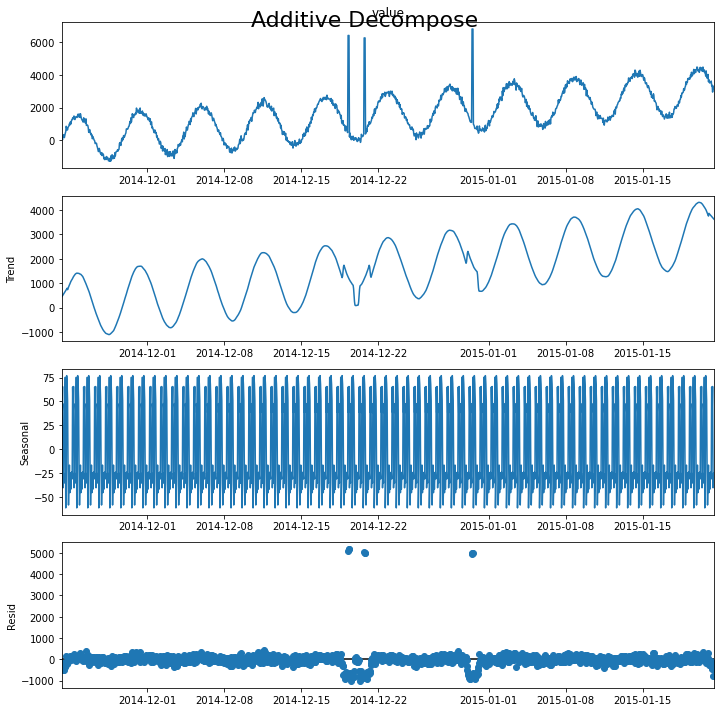



File: A2Benchmarksynthetic_11
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    5097.655201
2014-12-19 07:00:00    5170.747173
2014-12-19 08:00:00    5184.493836
2014-12-20 17:00:00    5028.454984
2014-12-20 18:00:00    4999.506151
2014-12-20 19:00:00    4975.421031
2014-12-30 12:00:00    4941.587483
2014-12-30 13:00:00    4999.870276
2014-12-30 14:00:00    5013.014486
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_12add_STL


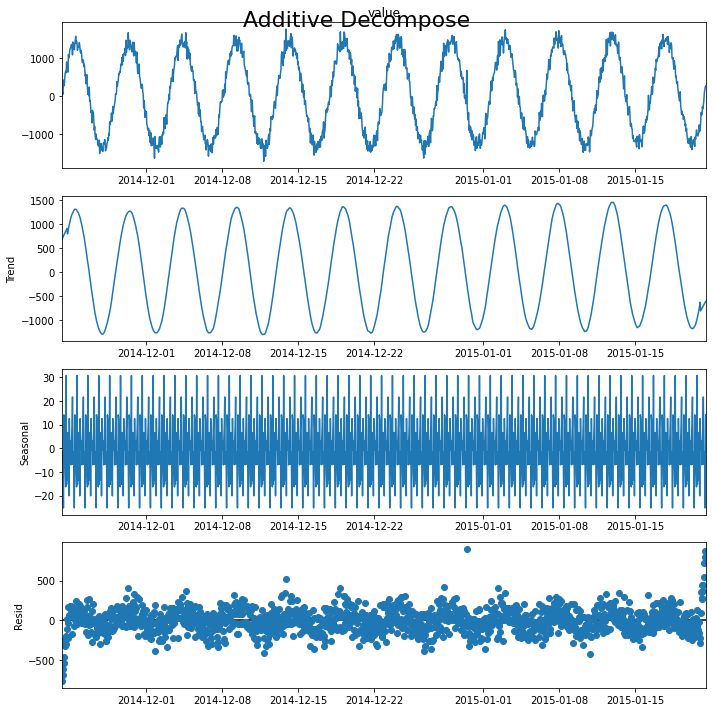



File: A2Benchmarksynthetic_12
threshold: 500
Outliers:
timestamp
2014-12-13 21:00:00    518.229909
2014-12-30 12:00:00    899.590151
2015-01-21 07:00:00    546.091961
2015-01-21 08:00:00    719.254489
2015-01-21 09:00:00    800.955609
2015-01-21 10:00:00    878.920756
2015-01-21 11:00:00    859.589505
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_13add_STL


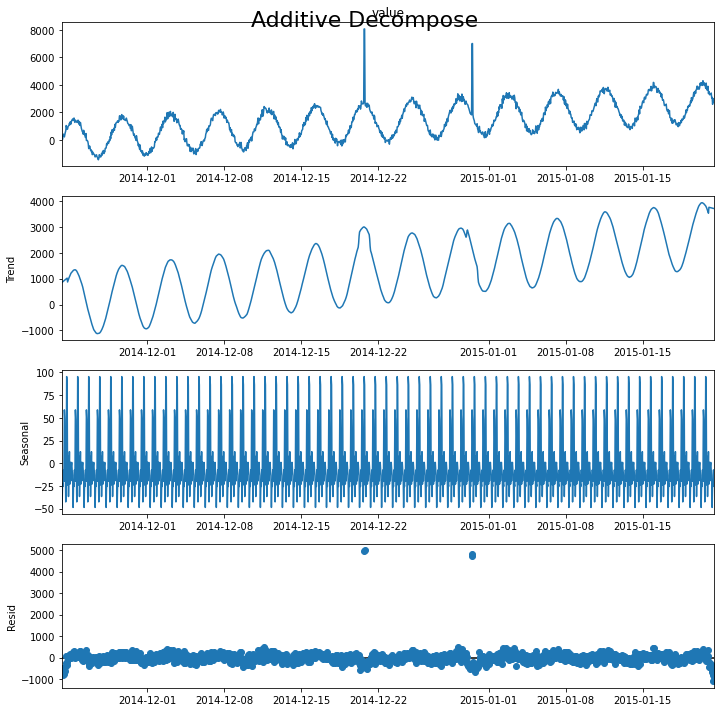



File: A2Benchmarksynthetic_13
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    4966.348775
2014-12-20 18:00:00    4986.096620
2014-12-29 05:00:00     505.866852
2014-12-30 12:00:00    4733.056532
2014-12-30 13:00:00    4821.207605
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_14add_STL


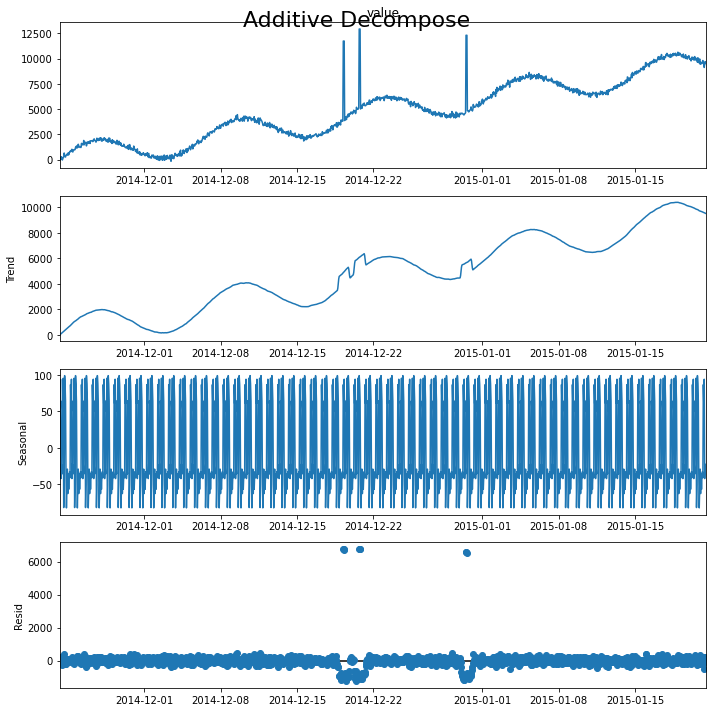



File: A2Benchmarksynthetic_14
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    6769.365597
2014-12-19 07:00:00    6762.466346
2014-12-19 08:00:00    6692.283881
2014-12-20 17:00:00    6760.127091
2014-12-20 18:00:00    6749.287440
2014-12-20 19:00:00    6749.407831
2014-12-30 12:00:00    6600.879257
2014-12-30 13:00:00    6598.191189
2014-12-30 14:00:00    6539.964757
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_15add_STL


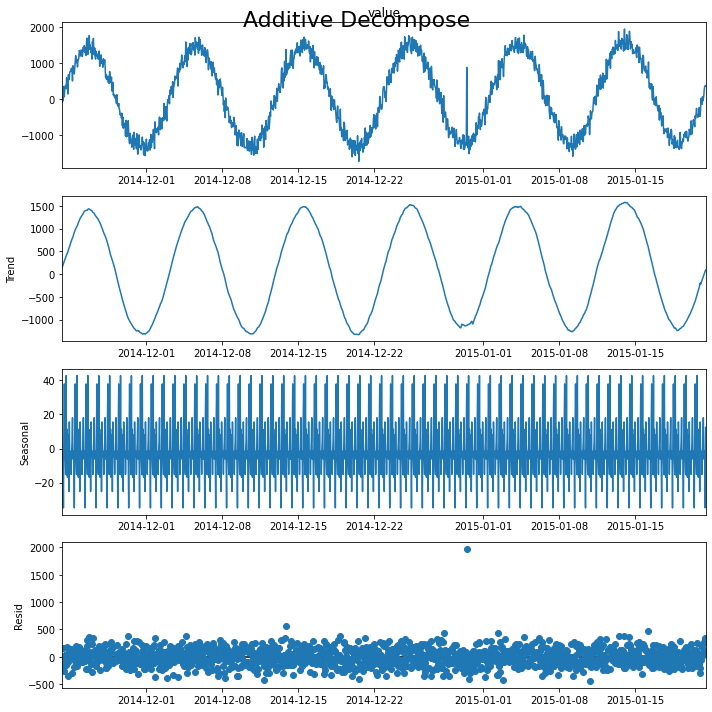



File: A2Benchmarksynthetic_15
threshold: 500
Outliers:
timestamp
2014-12-13 21:00:00     555.685017
2014-12-30 12:00:00    1973.810656
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_16add_STL


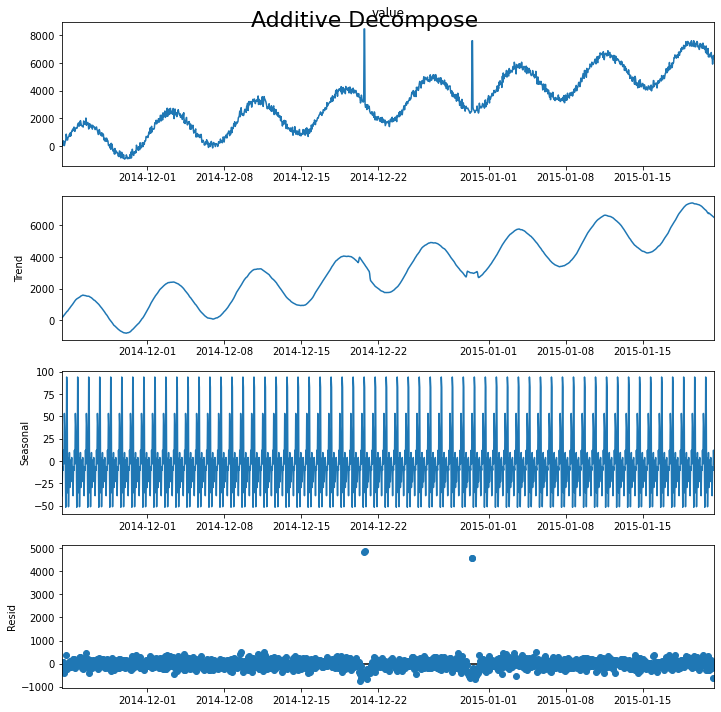



File: A2Benchmarksynthetic_16
threshold: 500
Outliers:
timestamp
2014-12-09 13:00:00     514.105247
2014-12-11 15:00:00     513.102094
2014-12-20 17:00:00    4816.755116
2014-12-20 18:00:00    4877.904403
2014-12-30 12:00:00    4569.638451
2014-12-30 13:00:00    4593.284562
2015-01-05 07:00:00     502.952377
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_17add_STL


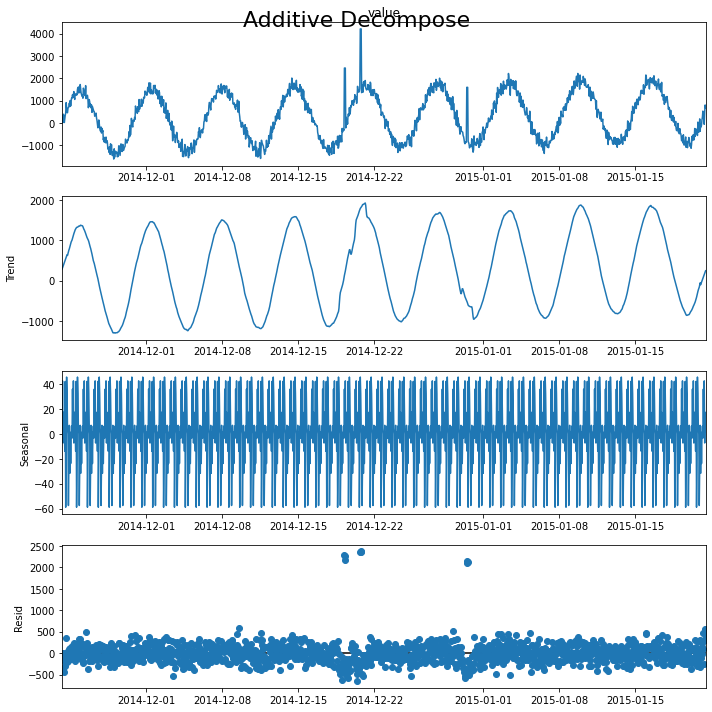



File: A2Benchmarksynthetic_17
threshold: 500
Outliers:
timestamp
2014-12-09 13:00:00     594.849188
2014-12-19 06:00:00    2287.358933
2014-12-19 07:00:00    2271.483046
2014-12-19 08:00:00    2174.836732
2014-12-20 17:00:00    2366.885292
2014-12-20 18:00:00    2364.824872
2014-12-20 19:00:00    2376.670578
2014-12-29 05:00:00     521.451642
2014-12-30 12:00:00    2094.114192
2014-12-30 13:00:00    2141.610494
2014-12-30 14:00:00    2120.512364
2015-01-21 10:00:00     570.142923
Name: resid, dtype: float64
Processing index: 10 of 100



A2Benchmark_A2Benchmarksynthetic_18add_STL


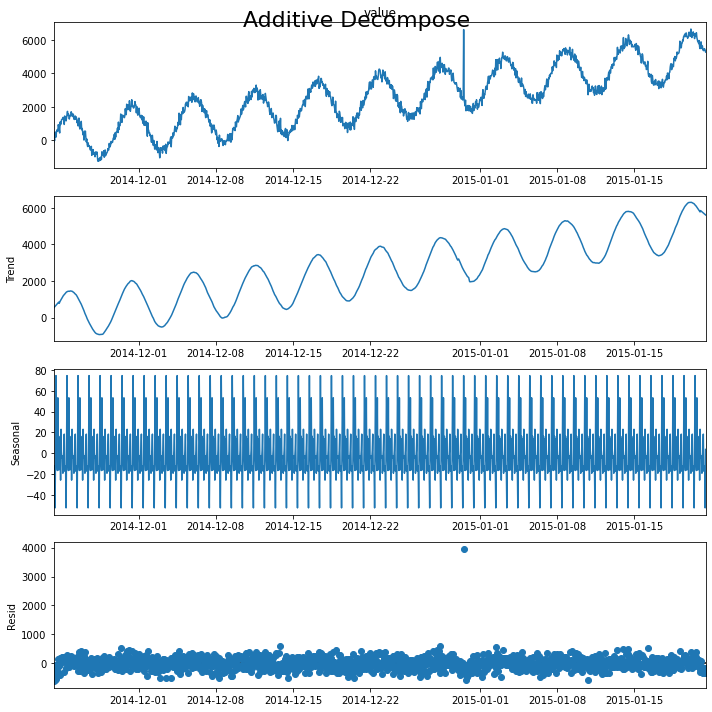



File: A2Benchmarksynthetic_18
threshold: 500
Outliers:
timestamp
2014-11-29 09:00:00     519.952196
2014-12-13 21:00:00     588.323442
2014-12-28 09:00:00     613.806239
2014-12-30 12:00:00    3954.592070
2015-01-02 10:00:00     566.404252
2015-01-16 05:00:00     523.896653
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_19add_STL


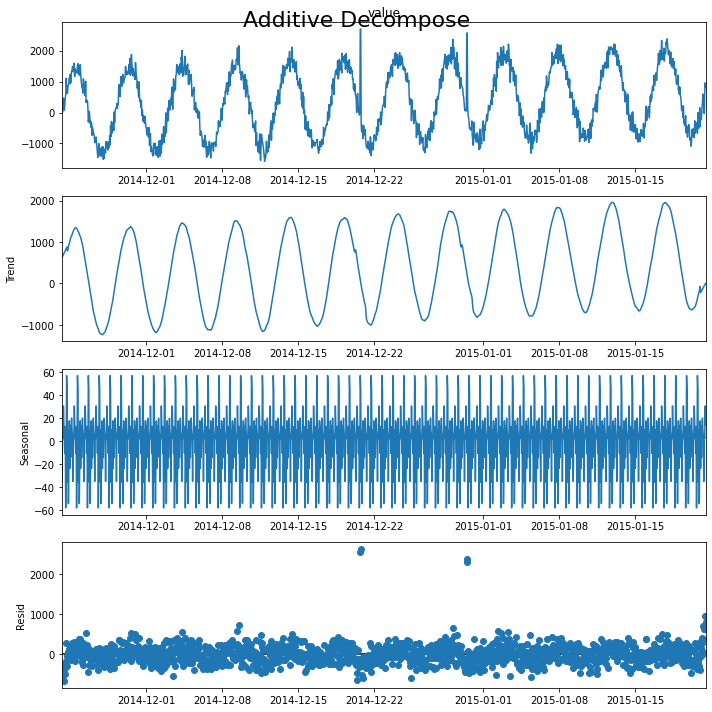



File: A2Benchmarksynthetic_19
threshold: 500
Outliers:
timestamp
2014-11-25 11:00:00     520.980222
2014-11-29 16:00:00     539.124376
2014-11-30 01:00:00     515.787585
2014-12-04 08:00:00     541.564093
2014-12-09 10:00:00     570.088062
2014-12-09 13:00:00     738.338568
2014-12-14 10:00:00     502.951752
2014-12-20 17:00:00    2543.158313
2014-12-20 18:00:00    2630.254526
2014-12-29 05:00:00     646.398768
2014-12-30 12:00:00    2303.094641
2014-12-30 13:00:00    2389.841862
2015-01-02 08:00:00     569.731602
2015-01-02 15:00:00     529.947855
2015-01-03 08:00:00     561.546764
2015-01-17 10:00:00     509.745124
2015-01-21 05:00:00     704.575155
2015-01-21 07:00:00     617.360995
2015-01-21 09:00:00     631.255584
2015-01-21 10:00:00     944.555644
2015-01-21 11:00:00     797.675564
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_2add_STL


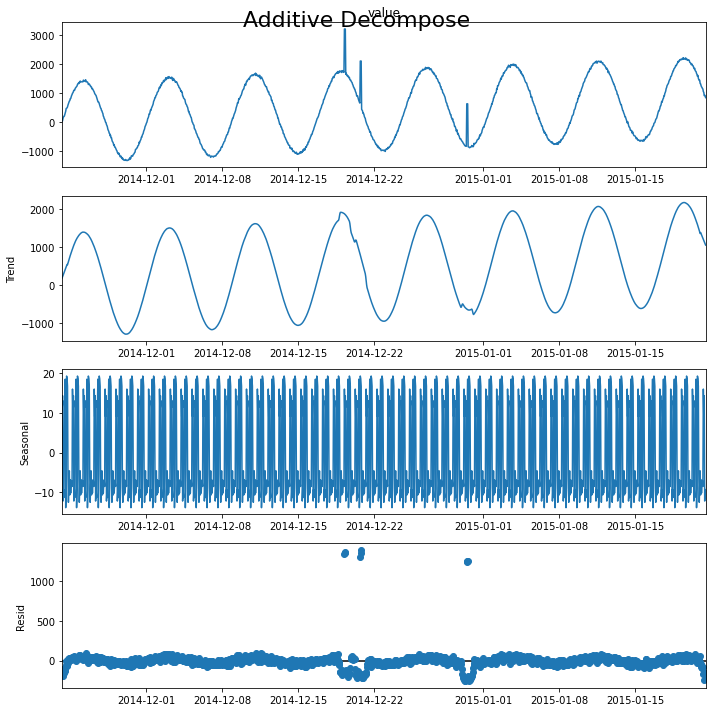



File: A2Benchmarksynthetic_2
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    1336.141758
2014-12-19 07:00:00    1354.743755
2014-12-19 08:00:00    1362.022586
2014-12-20 17:00:00    1301.462227
2014-12-20 18:00:00    1347.539611
2014-12-20 19:00:00    1394.729580
2014-12-30 12:00:00    1244.776908
2014-12-30 13:00:00    1255.079829
2014-12-30 14:00:00    1255.735410
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_20add_STL


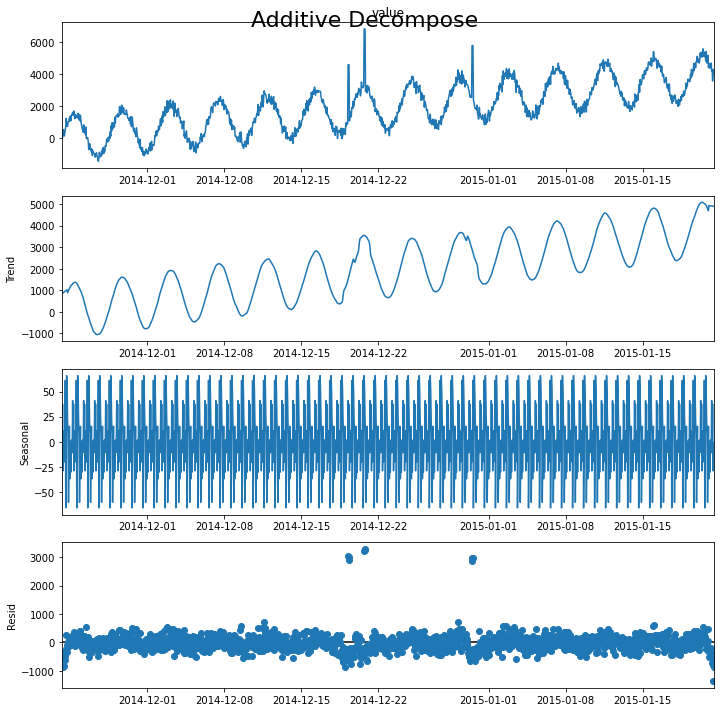



File: A2Benchmarksynthetic_20
threshold: 500
Outliers:
timestamp
2014-11-25 11:00:00     551.249943
2014-11-29 16:00:00     510.570394
2014-12-02 20:00:00     532.226013
2014-12-09 13:00:00     565.058796
2014-12-11 02:00:00     501.878878
2014-12-11 11:00:00     525.334884
2014-12-11 15:00:00     707.656900
2014-12-11 16:00:00     517.871707
2014-12-19 06:00:00    3032.112482
2014-12-19 07:00:00    3012.748989
2014-12-19 08:00:00    2888.293381
2014-12-20 17:00:00    3221.093357
2014-12-20 18:00:00    3249.429228
2014-12-20 19:00:00    3294.728459
2014-12-29 05:00:00     715.990557
2014-12-30 12:00:00    2878.439672
2014-12-30 13:00:00    2974.314414
2014-12-30 14:00:00    2991.739567
2015-01-02 08:00:00     588.672209
2015-01-02 15:00:00     585.996775
2015-01-03 08:00:00     559.694081
2015-01-15 23:00:00     594.686046
2015-01-16 00:00:00     598.558075
2015-01-20 11:00:00     547.445744
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_21add_STL


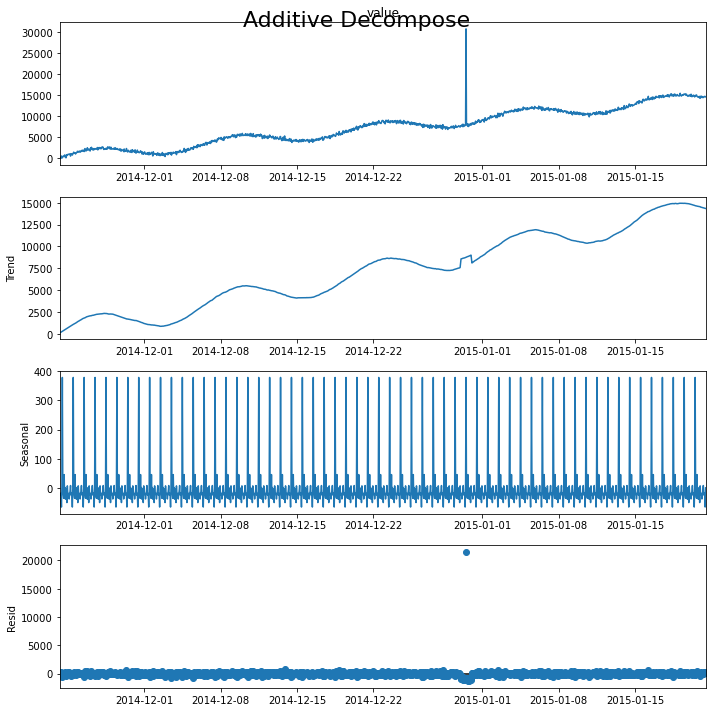



File: A2Benchmarksynthetic_21
threshold: 500
Outliers:
timestamp
2014-11-29 09:00:00      571.813444
2014-12-01 20:00:00      505.341062
2014-12-13 21:00:00      767.416955
2014-12-18 21:00:00      563.583673
2014-12-21 04:00:00      543.353804
2014-12-28 09:00:00      623.978209
2014-12-30 12:00:00    21550.896677
2015-01-02 10:00:00      609.646952
2015-01-06 04:00:00      504.264110
2015-01-13 11:00:00      502.757588
2015-01-14 00:00:00      514.009796
2015-01-16 05:00:00      665.962688
Name: resid, dtype: float64



A2Benchmark_A2Benchmarksynthetic_22add_STL


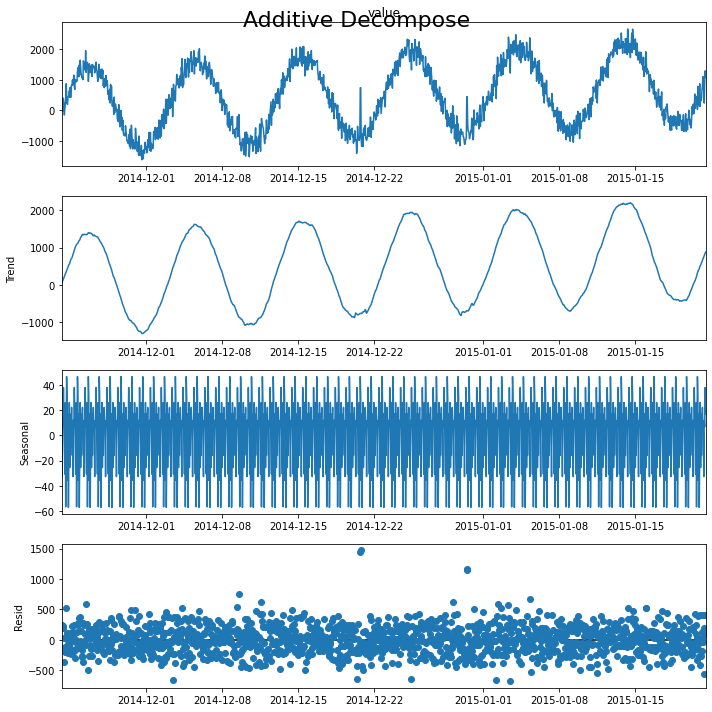



File: A2Benchmarksynthetic_22
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00     527.858507
2014-11-25 11:00:00     585.352726
2014-12-04 08:00:00     529.410373
2014-12-09 10:00:00     532.622709
2014-12-09 13:00:00     750.488923
2014-12-11 15:00:00     626.410056
2014-12-20 17:00:00    1446.657906
2014-12-20 18:00:00    1468.329618
2014-12-29 05:00:00     626.159432
2014-12-30 12:00:00    1141.111214
2014-12-30 13:00:00    1161.599383
2014-12-31 04:00:00     510.494395
2015-01-02 08:00:00     587.830825
2015-01-02 15:00:00     518.029876
2015-01-03 08:00:00     567.680685
2015-01-05 07:00:00     672.500216
2015-01-14 07:00:00     523.437345
2015-01-15 23:00:00     524.278781
2015-01-16 00:00:00     522.099593
Name: resid, dtype: float64
STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:10.847518


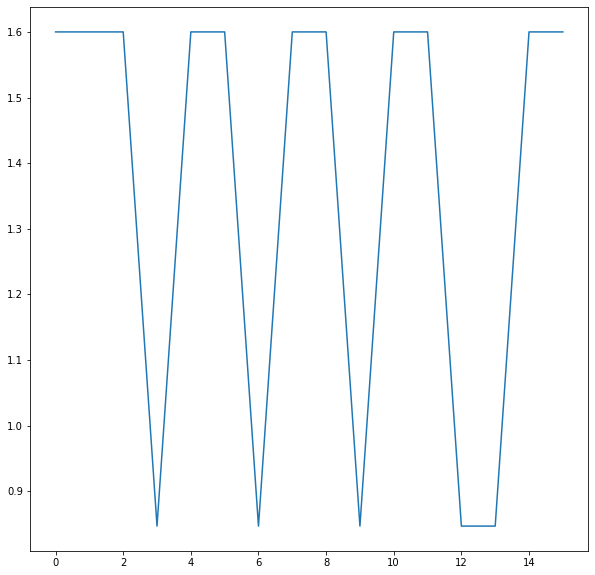

In [31]:
start_time = datetime.now() 
f1_plot = []
for index,file in enumerate(all_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 15:
         break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A2Benchmark_" + fname +"add_STL")
    print("\n\n\nA2Benchmark_" + fname +"add_STL")
    plt.show()
    threshold=500
    residualdf = result_add.resid
    outliers = residualdf[residualdf > threshold]
    p = df_indexed.loc[df_indexed['is_anomaly'] == 1]
    
    n = df_indexed.loc[df_indexed['is_anomaly'] == 0]
    
    truepositives = anomalies.loc[anomalies['is_anomaly'] == 1]
    
    falsepositives = anomalies.loc[anomalies['is_anomaly'] == 0]
    
    truenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 0]
    
    falsenegatives = not_anomalies.loc[not_anomalies['is_anomaly'] == 1]
    
    #Traditional FPR and TPR formmulae
    #tpr = truepositives.count()/(truepositives.count() + falsenegatives.count())
    #fpr = falsepositives.count()/(falsepositives.count() + truenegatives.count())
    
    #IDEAL Paper based TRP/FPR rates
    fpr = len(falsepositives)/len(n)
    tpr = len(truepositives)/len(p)
    fnr = 1-tpr
    tnr = 1-fpr
    
    precision = len(truepositives)/(tpr + fpr)
    recall = tpr/(tpr + fnr)
    
    f1 = 2 * ((precision * recall)/(precision + recall))
    f1_plot.append(f1)
    
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        file.write("\n\n\n Statistics:")
        file.write(f"\ntrue positives:{len(truepositives)}")
        file.write(f"\nfalse positives:{len(falsepositives)}")
        file.write(f"\ntrue negatives:{len(truenegatives)}")
        file.write(f"\nfalse negatives:{len(falsenegatives)}")
        file.write(f"\nFPR:{fpr}")
        file.write(f"\nTPR:{tpr}")
        file.write(f"\nFNR:{fnr}")
        file.write(f"\nTNR:{tnr}")
        
        file.write(f"\nPrecision:{precision}")
        file.write(f"\nREcall:{recall}")
        file.write(f"\nF1:{f1}")
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Outliers:")
    print(outliers)
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
plt.plot(f1_plot)

In [32]:
print(f"STL Add`itive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")

STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:10.847518


In [51]:
print(sum(f1_plot)/len(f1_plot))

1.3647058823529414


## A1 Folder - real Yahoo server traffic dataset

In [33]:
a1_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark/**/*.csv', recursive=True)
start_time = datetime.now() 
print(f'Loaded the paths of {len(a1_csv)} files from disk. Begin processing at: {start_time}')
for index,file in enumerate(a1_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(a1_csv)}')
    if index > 50:
         break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A1Benchmark_" + fname +"_add_STL")
    print("\n\n\nA1Benchmark_" + fname +"_add_STL")
    plt.show()
    threshold=500
    residualdf = result_add.resid
    outliers = residualdf[residualdf > threshold]
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Outliers:")
    print(outliers)
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A1 Benchmark processing complete. Time taken:{end_time-start_time}")

Loaded the paths of 0 files from disk. Begin processing at: 2020-07-24 12:05:24.687977
STL Additive decomposition of Yahoo S5 A1 Benchmark processing complete. Time taken:0:00:00.001040


## A3 Folder - Synthetic data with outliers specified

In [34]:
a3_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark/A3Benchmark-TS*.csv', recursive=True)
start_time = datetime.now() 
for index,file in enumerate(a3_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(a3_csv)}')
    if index > 50:
         break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A3Benchmark_" + fname +"_add_STL")
    print("\n\n\nA3Benchmark_" + fname +"_add_STL")
    plt.show()
    threshold=500
    residualdf = result_add.resid
    outliers = residualdf[residualdf > threshold]
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Outliers:")
    print(outliers)
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A3 Benchmark processing complete. Time taken:{end_time-start_time}")

STL Additive decomposition of Yahoo S5 A3 Benchmark processing complete. Time taken:0:00:00


## A4 Folder - Synthetic data with outliers, changepoints and seasonalities.

Processing index: 0 of 100



A4Benchmark_A2Benchmarksynthetic_1_add_STL


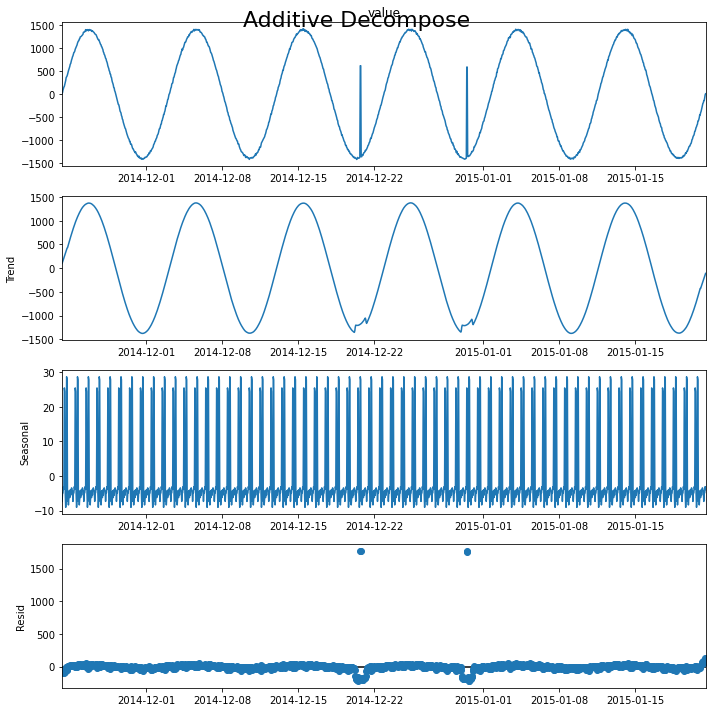



File: A2Benchmarksynthetic_1
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1772.222450
2014-12-20 18:00:00    1766.344219
2014-12-30 12:00:00    1760.350798
2014-12-30 13:00:00    1755.882094
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_10_add_STL


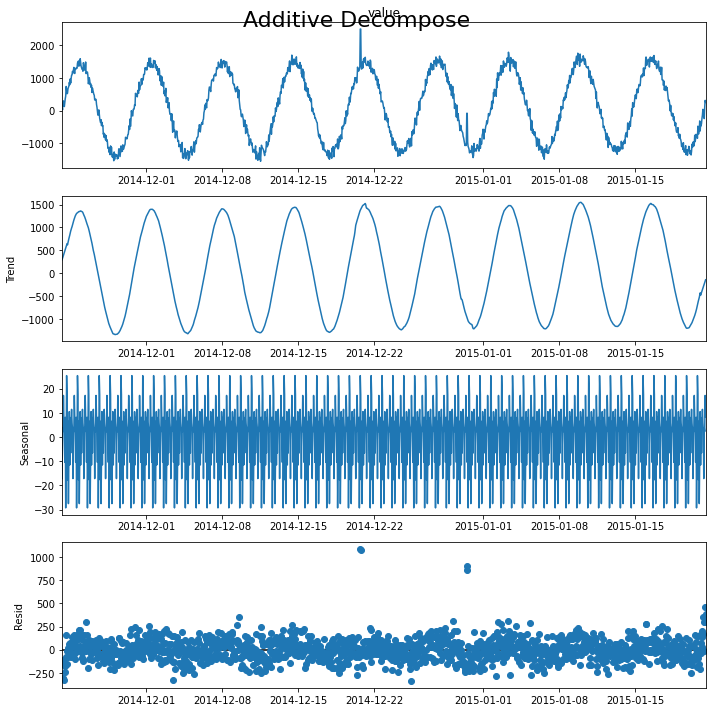



File: A2Benchmarksynthetic_10
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1088.668787
2014-12-20 18:00:00    1077.463440
2014-12-30 12:00:00     861.051098
2014-12-30 13:00:00     900.266830
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_100_add_STL


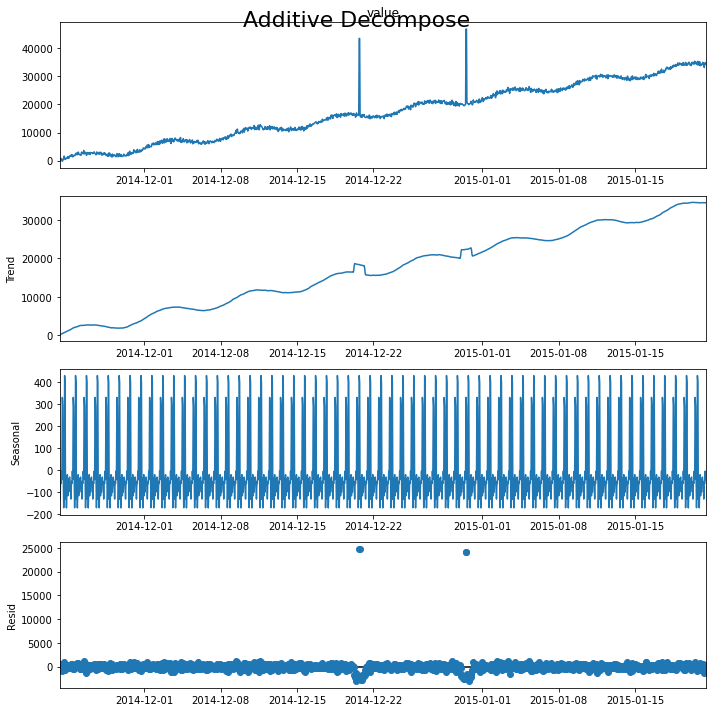



File: A2Benchmarksynthetic_100
threshold: 500
Outliers:
timestamp
2014-11-23 07:00:00     510.047397
2014-11-23 16:00:00    1023.235688
2014-11-24 09:00:00     525.001815
2014-11-24 19:00:00     564.290616
2014-11-24 21:00:00     714.436649
                          ...     
2015-01-19 22:00:00     698.636921
2015-01-20 11:00:00     888.408219
2015-01-20 14:00:00     565.266072
2015-01-20 22:00:00     825.323223
2015-01-21 05:00:00     574.096495
Name: resid, Length: 172, dtype: float64



A4Benchmark_A2Benchmarksynthetic_11_add_STL


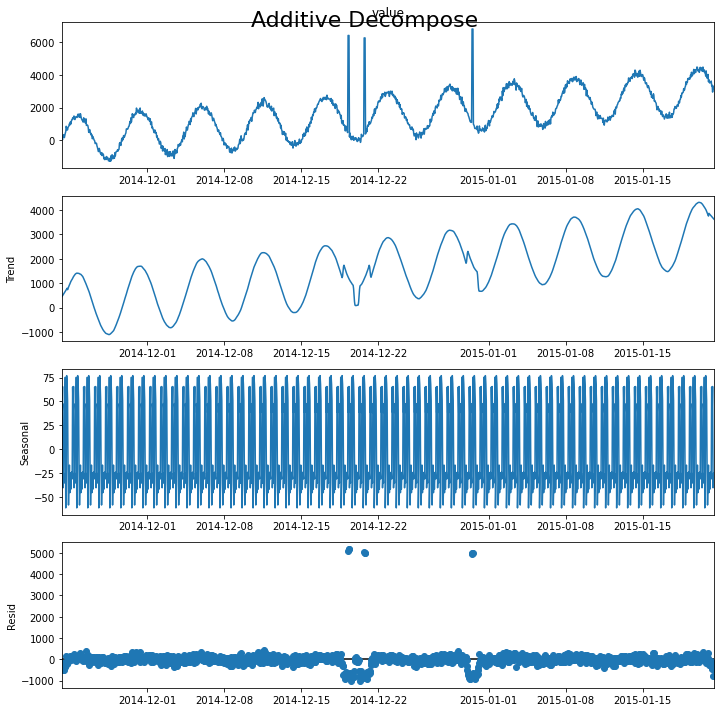



File: A2Benchmarksynthetic_11
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    5097.655201
2014-12-19 07:00:00    5170.747173
2014-12-19 08:00:00    5184.493836
2014-12-20 17:00:00    5028.454984
2014-12-20 18:00:00    4999.506151
2014-12-20 19:00:00    4975.421031
2014-12-30 12:00:00    4941.587483
2014-12-30 13:00:00    4999.870276
2014-12-30 14:00:00    5013.014486
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_12_add_STL


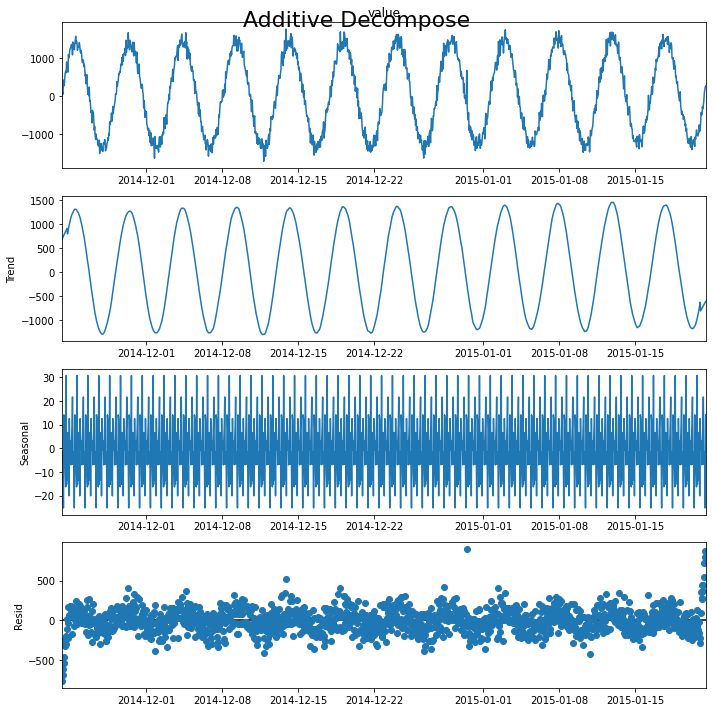



File: A2Benchmarksynthetic_12
threshold: 500
Outliers:
timestamp
2014-12-13 21:00:00    518.229909
2014-12-30 12:00:00    899.590151
2015-01-21 07:00:00    546.091961
2015-01-21 08:00:00    719.254489
2015-01-21 09:00:00    800.955609
2015-01-21 10:00:00    878.920756
2015-01-21 11:00:00    859.589505
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_13_add_STL


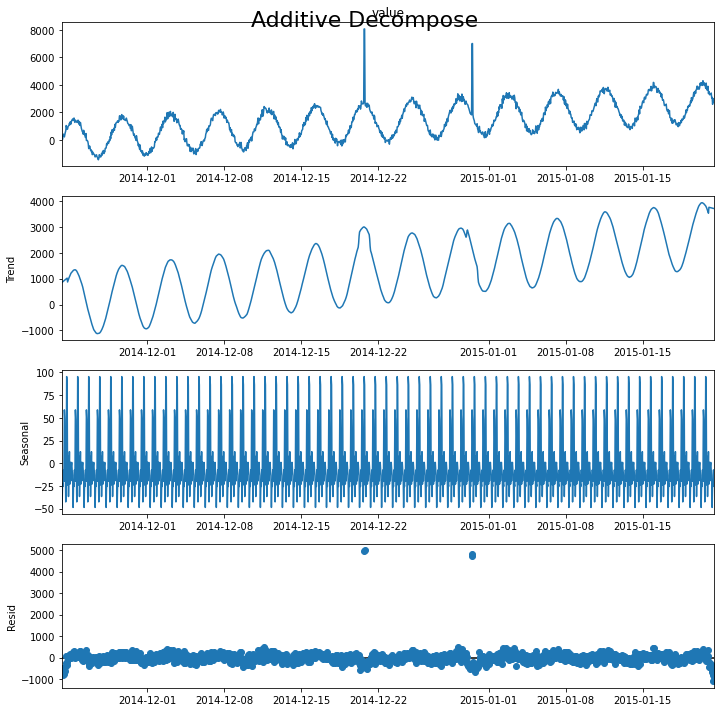



File: A2Benchmarksynthetic_13
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    4966.348775
2014-12-20 18:00:00    4986.096620
2014-12-29 05:00:00     505.866852
2014-12-30 12:00:00    4733.056532
2014-12-30 13:00:00    4821.207605
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_14_add_STL


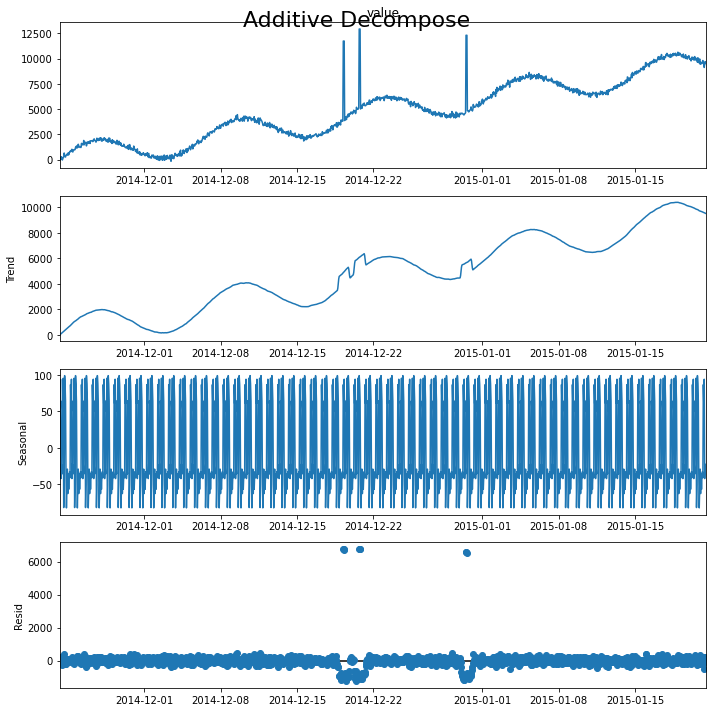



File: A2Benchmarksynthetic_14
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    6769.365597
2014-12-19 07:00:00    6762.466346
2014-12-19 08:00:00    6692.283881
2014-12-20 17:00:00    6760.127091
2014-12-20 18:00:00    6749.287440
2014-12-20 19:00:00    6749.407831
2014-12-30 12:00:00    6600.879257
2014-12-30 13:00:00    6598.191189
2014-12-30 14:00:00    6539.964757
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_15_add_STL


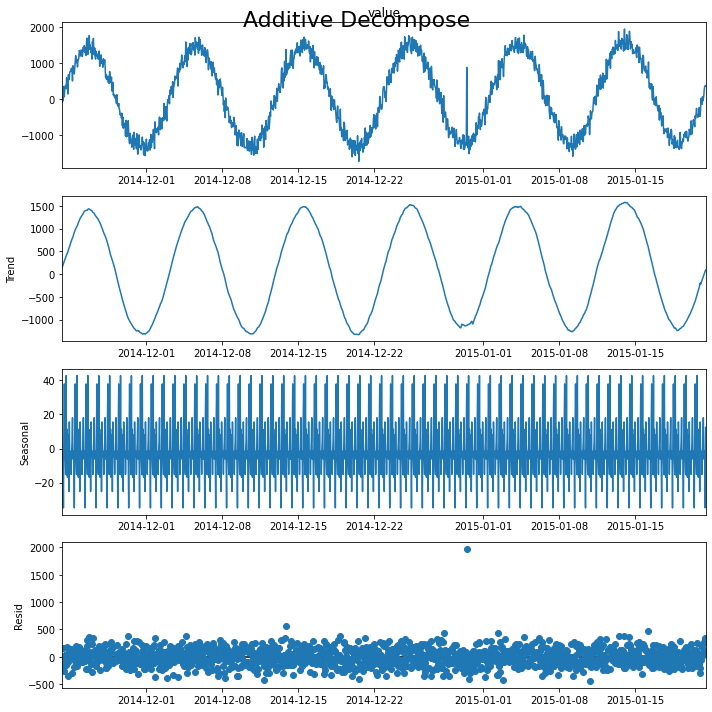



File: A2Benchmarksynthetic_15
threshold: 500
Outliers:
timestamp
2014-12-13 21:00:00     555.685017
2014-12-30 12:00:00    1973.810656
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_16_add_STL


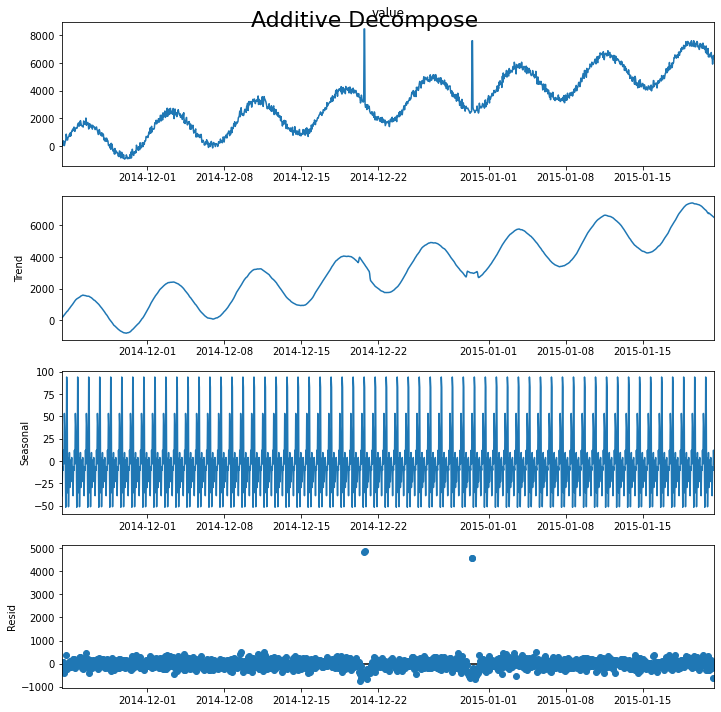



File: A2Benchmarksynthetic_16
threshold: 500
Outliers:
timestamp
2014-12-09 13:00:00     514.105247
2014-12-11 15:00:00     513.102094
2014-12-20 17:00:00    4816.755116
2014-12-20 18:00:00    4877.904403
2014-12-30 12:00:00    4569.638451
2014-12-30 13:00:00    4593.284562
2015-01-05 07:00:00     502.952377
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_17_add_STL


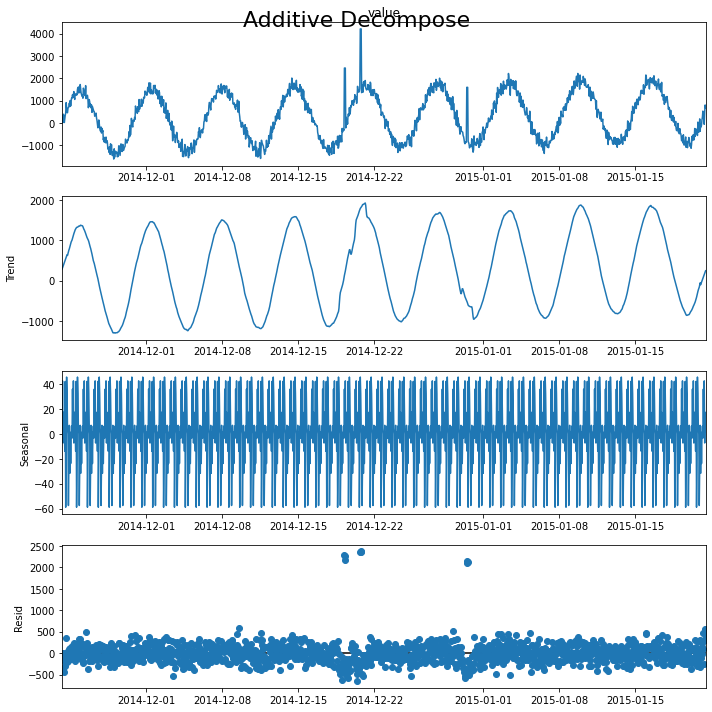



File: A2Benchmarksynthetic_17
threshold: 500
Outliers:
timestamp
2014-12-09 13:00:00     594.849188
2014-12-19 06:00:00    2287.358933
2014-12-19 07:00:00    2271.483046
2014-12-19 08:00:00    2174.836732
2014-12-20 17:00:00    2366.885292
2014-12-20 18:00:00    2364.824872
2014-12-20 19:00:00    2376.670578
2014-12-29 05:00:00     521.451642
2014-12-30 12:00:00    2094.114192
2014-12-30 13:00:00    2141.610494
2014-12-30 14:00:00    2120.512364
2015-01-21 10:00:00     570.142923
Name: resid, dtype: float64
Processing index: 10 of 100



A4Benchmark_A2Benchmarksynthetic_18_add_STL


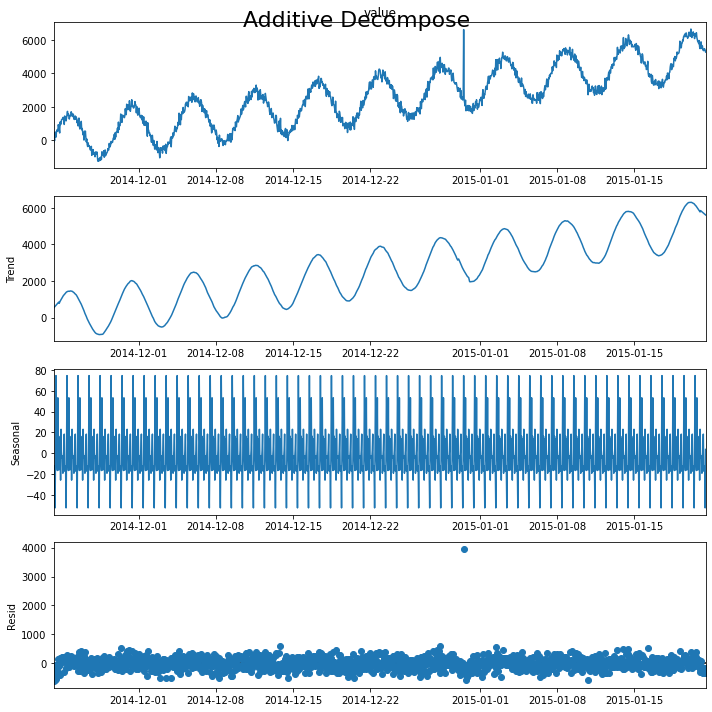



File: A2Benchmarksynthetic_18
threshold: 500
Outliers:
timestamp
2014-11-29 09:00:00     519.952196
2014-12-13 21:00:00     588.323442
2014-12-28 09:00:00     613.806239
2014-12-30 12:00:00    3954.592070
2015-01-02 10:00:00     566.404252
2015-01-16 05:00:00     523.896653
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_19_add_STL


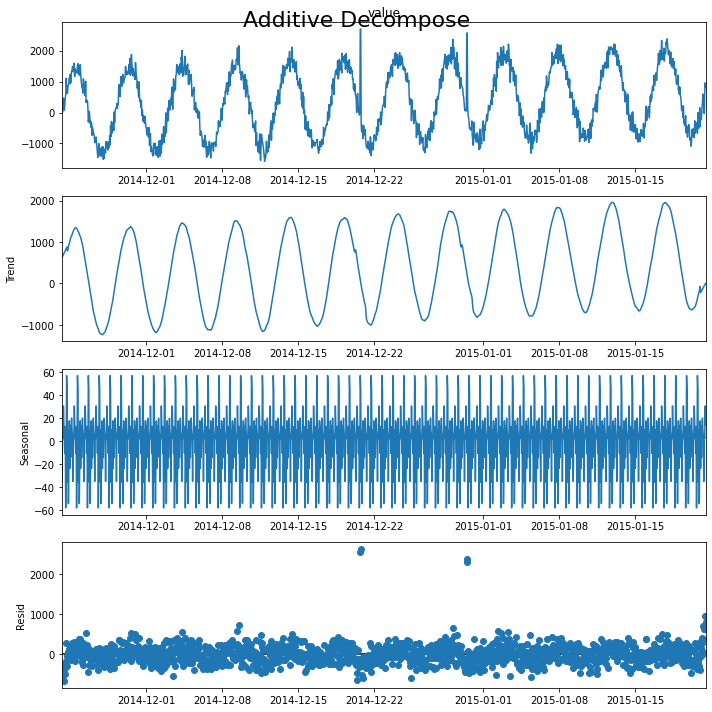



File: A2Benchmarksynthetic_19
threshold: 500
Outliers:
timestamp
2014-11-25 11:00:00     520.980222
2014-11-29 16:00:00     539.124376
2014-11-30 01:00:00     515.787585
2014-12-04 08:00:00     541.564093
2014-12-09 10:00:00     570.088062
2014-12-09 13:00:00     738.338568
2014-12-14 10:00:00     502.951752
2014-12-20 17:00:00    2543.158313
2014-12-20 18:00:00    2630.254526
2014-12-29 05:00:00     646.398768
2014-12-30 12:00:00    2303.094641
2014-12-30 13:00:00    2389.841862
2015-01-02 08:00:00     569.731602
2015-01-02 15:00:00     529.947855
2015-01-03 08:00:00     561.546764
2015-01-17 10:00:00     509.745124
2015-01-21 05:00:00     704.575155
2015-01-21 07:00:00     617.360995
2015-01-21 09:00:00     631.255584
2015-01-21 10:00:00     944.555644
2015-01-21 11:00:00     797.675564
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_2_add_STL


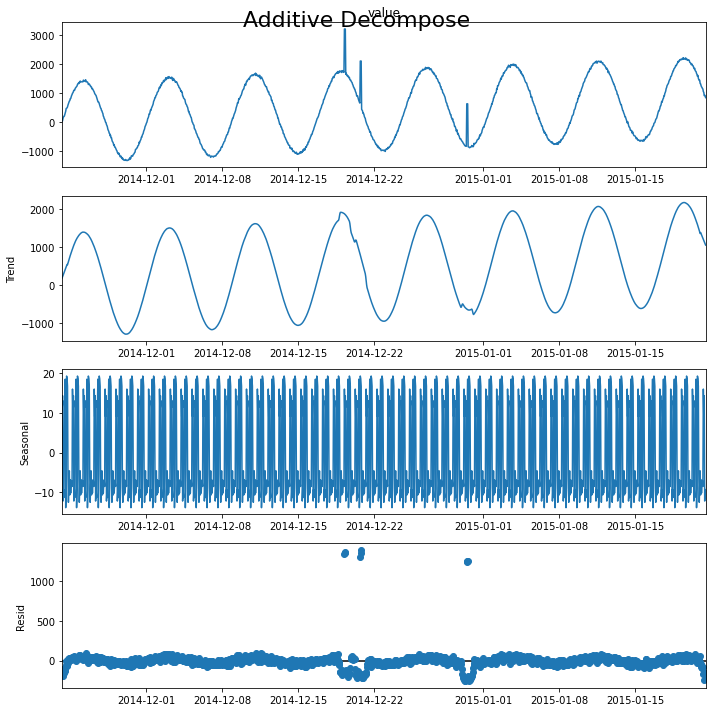



File: A2Benchmarksynthetic_2
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    1336.141758
2014-12-19 07:00:00    1354.743755
2014-12-19 08:00:00    1362.022586
2014-12-20 17:00:00    1301.462227
2014-12-20 18:00:00    1347.539611
2014-12-20 19:00:00    1394.729580
2014-12-30 12:00:00    1244.776908
2014-12-30 13:00:00    1255.079829
2014-12-30 14:00:00    1255.735410
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_20_add_STL


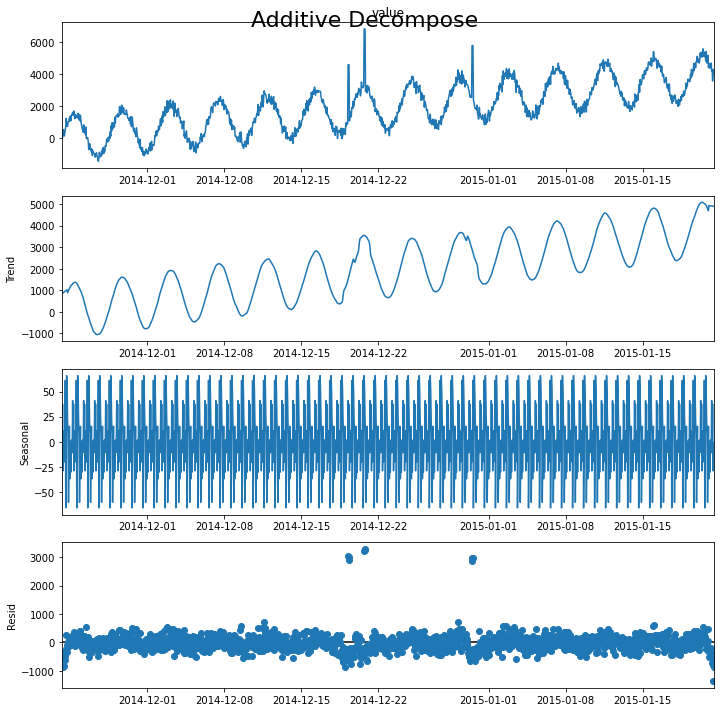



File: A2Benchmarksynthetic_20
threshold: 500
Outliers:
timestamp
2014-11-25 11:00:00     551.249943
2014-11-29 16:00:00     510.570394
2014-12-02 20:00:00     532.226013
2014-12-09 13:00:00     565.058796
2014-12-11 02:00:00     501.878878
2014-12-11 11:00:00     525.334884
2014-12-11 15:00:00     707.656900
2014-12-11 16:00:00     517.871707
2014-12-19 06:00:00    3032.112482
2014-12-19 07:00:00    3012.748989
2014-12-19 08:00:00    2888.293381
2014-12-20 17:00:00    3221.093357
2014-12-20 18:00:00    3249.429228
2014-12-20 19:00:00    3294.728459
2014-12-29 05:00:00     715.990557
2014-12-30 12:00:00    2878.439672
2014-12-30 13:00:00    2974.314414
2014-12-30 14:00:00    2991.739567
2015-01-02 08:00:00     588.672209
2015-01-02 15:00:00     585.996775
2015-01-03 08:00:00     559.694081
2015-01-15 23:00:00     594.686046
2015-01-16 00:00:00     598.558075
2015-01-20 11:00:00     547.445744
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_21_add_STL


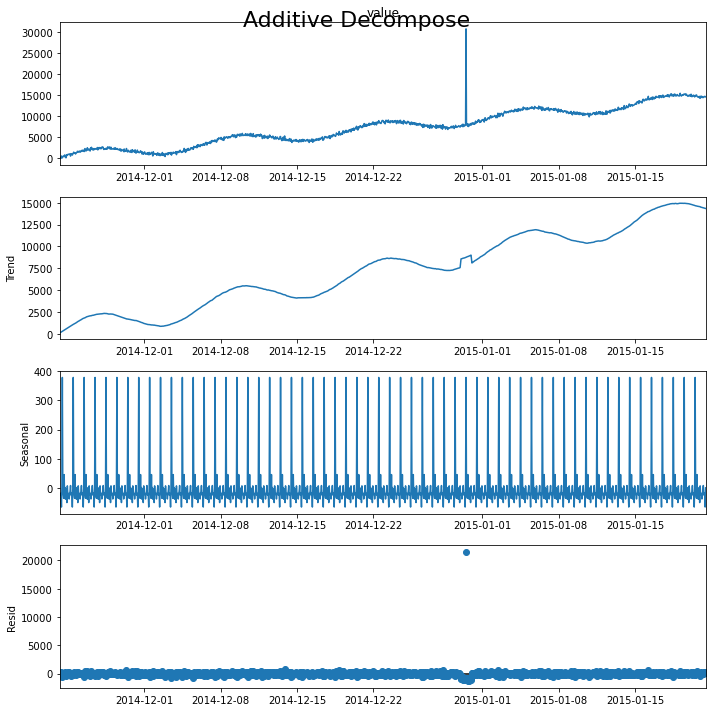



File: A2Benchmarksynthetic_21
threshold: 500
Outliers:
timestamp
2014-11-29 09:00:00      571.813444
2014-12-01 20:00:00      505.341062
2014-12-13 21:00:00      767.416955
2014-12-18 21:00:00      563.583673
2014-12-21 04:00:00      543.353804
2014-12-28 09:00:00      623.978209
2014-12-30 12:00:00    21550.896677
2015-01-02 10:00:00      609.646952
2015-01-06 04:00:00      504.264110
2015-01-13 11:00:00      502.757588
2015-01-14 00:00:00      514.009796
2015-01-16 05:00:00      665.962688
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_22_add_STL


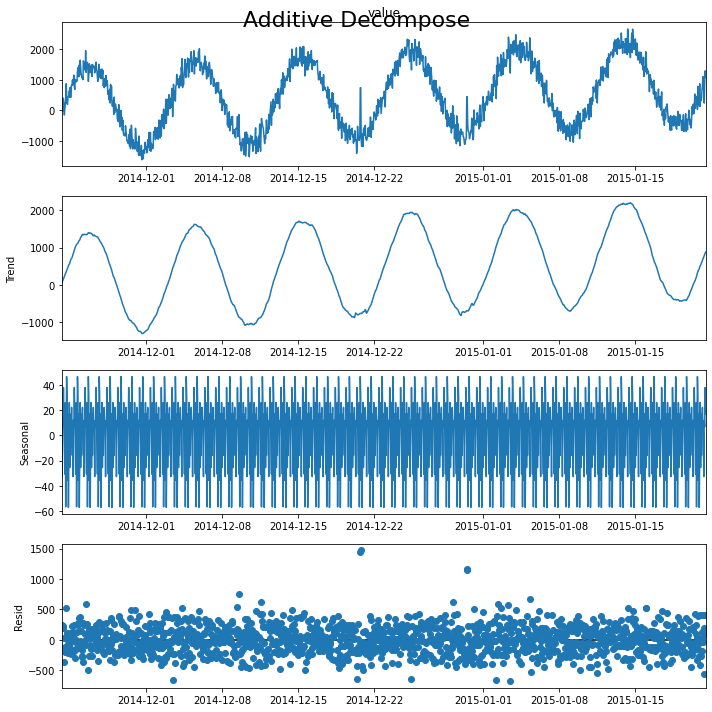



File: A2Benchmarksynthetic_22
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00     527.858507
2014-11-25 11:00:00     585.352726
2014-12-04 08:00:00     529.410373
2014-12-09 10:00:00     532.622709
2014-12-09 13:00:00     750.488923
2014-12-11 15:00:00     626.410056
2014-12-20 17:00:00    1446.657906
2014-12-20 18:00:00    1468.329618
2014-12-29 05:00:00     626.159432
2014-12-30 12:00:00    1141.111214
2014-12-30 13:00:00    1161.599383
2014-12-31 04:00:00     510.494395
2015-01-02 08:00:00     587.830825
2015-01-02 15:00:00     518.029876
2015-01-03 08:00:00     567.680685
2015-01-05 07:00:00     672.500216
2015-01-14 07:00:00     523.437345
2015-01-15 23:00:00     524.278781
2015-01-16 00:00:00     522.099593
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_23_add_STL


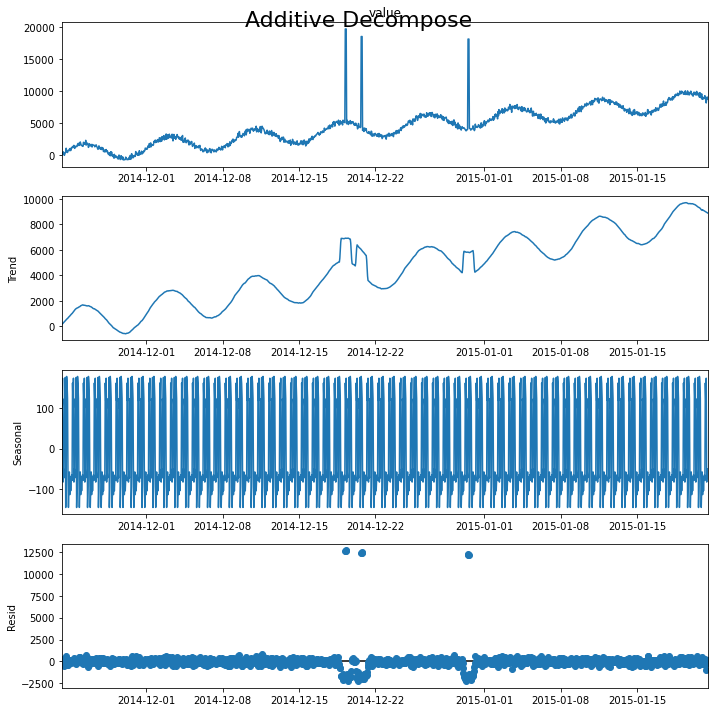



File: A2Benchmarksynthetic_23
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00      609.412803
2014-11-25 11:00:00      713.714995
2014-11-29 16:00:00      584.137552
2014-11-30 01:00:00      597.544468
2014-11-30 09:00:00      500.131602
2014-12-02 15:00:00      519.078276
2014-12-02 20:00:00      601.428111
2014-12-03 00:00:00      516.338877
2014-12-03 03:00:00      519.186079
2014-12-03 20:00:00      503.576514
2014-12-05 22:00:00      536.677690
2014-12-09 10:00:00      674.795980
2014-12-09 13:00:00      686.045905
2014-12-11 02:00:00      633.108695
2014-12-11 11:00:00      580.638736
2014-12-11 15:00:00      791.987764
2014-12-11 16:00:00      571.173188
2014-12-14 10:00:00      552.140630
2014-12-18 05:00:00      500.244035
2014-12-18 15:00:00      542.111850
2014-12-19 06:00:00    12661.586592
2014-12-19 07:00:00    12713.300549
2014-12-19 08:00:00    12660.462892
2014-12-20 17:00:00    12347.013019
2014-12-20 18:00:00    12415.899790
2014-12-20 19:00:00    12502.0355

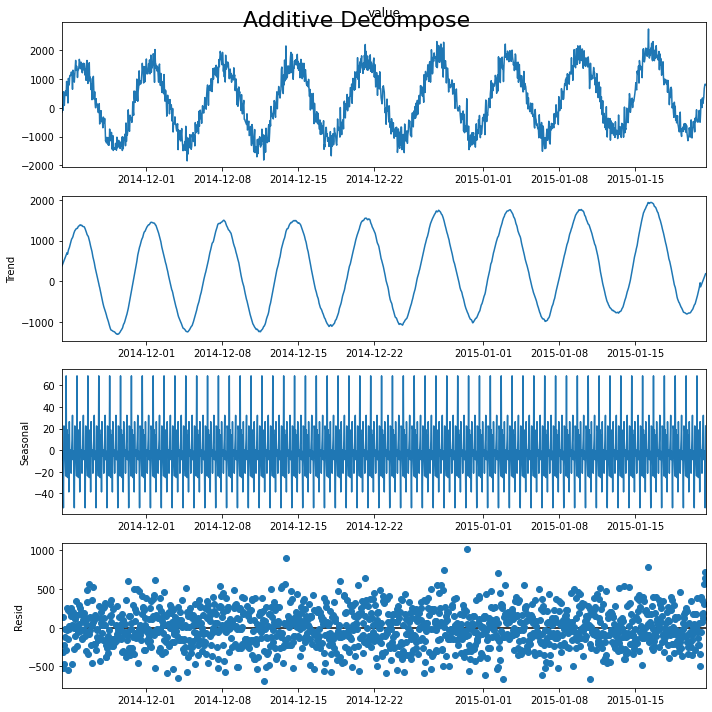



File: A2Benchmarksynthetic_24
threshold: 500
Outliers:
timestamp
2014-11-25 19:00:00     571.583155
2014-11-26 04:00:00     532.006943
2014-11-29 09:00:00     606.899393
2014-11-29 22:00:00     501.517400
2014-11-30 04:00:00     505.898106
2014-12-01 20:00:00     622.932354
2014-12-04 16:00:00     514.315289
2014-12-07 20:00:00     540.317676
2014-12-12 12:00:00     500.819043
2014-12-13 11:00:00     513.673147
2014-12-13 12:00:00     544.776760
2014-12-13 18:00:00     564.659184
2014-12-13 21:00:00     904.481717
2014-12-18 21:00:00     598.614684
2014-12-20 11:00:00     548.280040
2014-12-21 04:00:00     642.366090
2014-12-27 18:00:00     558.538346
2014-12-28 03:00:00     548.608256
2014-12-28 09:00:00     752.395125
2014-12-30 12:00:00    1014.024092
2015-01-02 10:00:00     703.877103
2015-01-03 01:00:00     548.191238
2015-01-04 18:00:00     551.567960
2015-01-09 09:00:00     505.258831
2015-01-11 19:00:00     510.587994
2015-01-13 11:00:00     511.710207
2015-01-14 00:00:00    

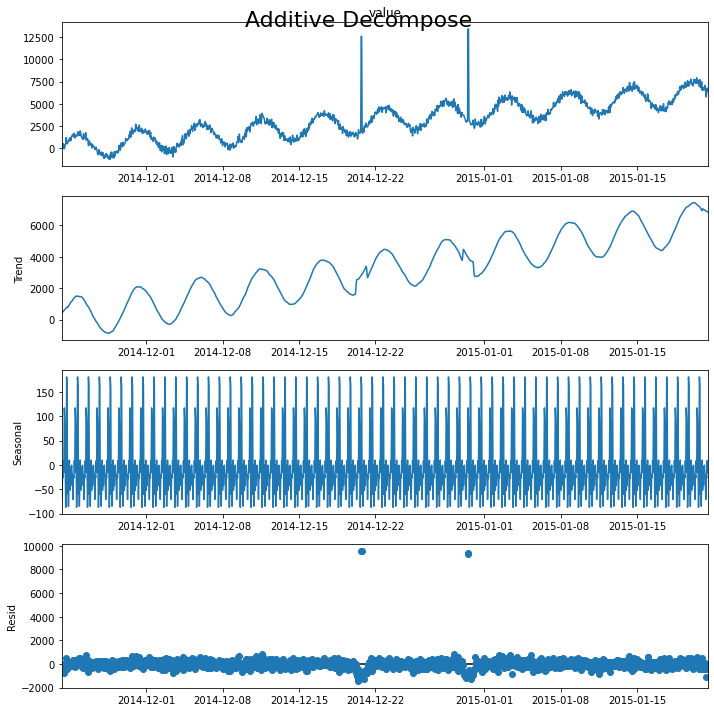



File: A2Benchmarksynthetic_25
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00     509.045420
2014-11-25 11:00:00     720.736139
2014-11-29 16:00:00     654.299623
2014-11-30 01:00:00     678.242954
2014-11-30 09:00:00     576.130935
2014-12-01 07:00:00     579.153078
2014-12-04 08:00:00     598.625072
2014-12-05 22:00:00     606.089905
2014-12-09 10:00:00     604.746528
2014-12-09 13:00:00     697.568592
2014-12-11 02:00:00     637.676085
2014-12-11 11:00:00     600.984781
2014-12-11 15:00:00     826.262024
2014-12-11 16:00:00     586.495840
2014-12-14 10:00:00     501.471280
2014-12-20 17:00:00    9570.089466
2014-12-20 18:00:00    9557.725565
2014-12-23 06:00:00     506.635192
2014-12-29 05:00:00     809.526625
2014-12-29 07:00:00     558.475542
2014-12-29 14:00:00     560.230917
2014-12-30 12:00:00    9310.321605
2014-12-30 13:00:00    9383.460616
2014-12-31 04:00:00     557.581585
2015-01-02 08:00:00     735.645565
2015-01-02 15:00:00     656.294475
2015-01-02 21:00:00    

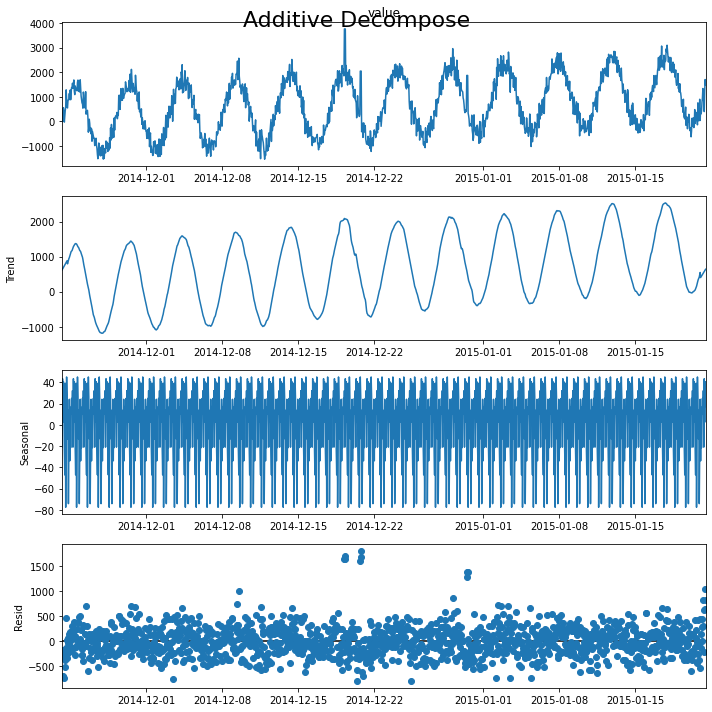



File: A2Benchmarksynthetic_26
threshold: 500
Outliers:
timestamp
2014-11-24 23:00:00     502.516154
2014-11-25 11:00:00     701.173642
2014-11-28 13:00:00     505.087059
2014-11-29 13:00:00     550.077490
2014-11-29 16:00:00     702.522741
2014-11-30 01:00:00     681.600866
2014-11-30 09:00:00     530.893397
2014-12-02 20:00:00     513.522555
2014-12-03 20:00:00     515.481229
2014-12-04 08:00:00     669.627722
2014-12-05 22:00:00     507.494970
2014-12-09 10:00:00     746.476613
2014-12-09 13:00:00    1008.860998
2014-12-11 02:00:00     519.493873
2014-12-11 15:00:00     680.676434
2014-12-13 14:00:00     521.708261
2014-12-14 10:00:00     655.253866
2014-12-18 15:00:00     557.474279
2014-12-19 06:00:00    1636.275990
2014-12-19 07:00:00    1699.075854
2014-12-19 08:00:00    1640.136700
2014-12-20 17:00:00    1593.798324
2014-12-20 18:00:00    1689.866721
2014-12-20 19:00:00    1802.190726
2014-12-28 12:00:00     580.992475
2014-12-29 05:00:00     852.878316
2014-12-29 07:00:00    

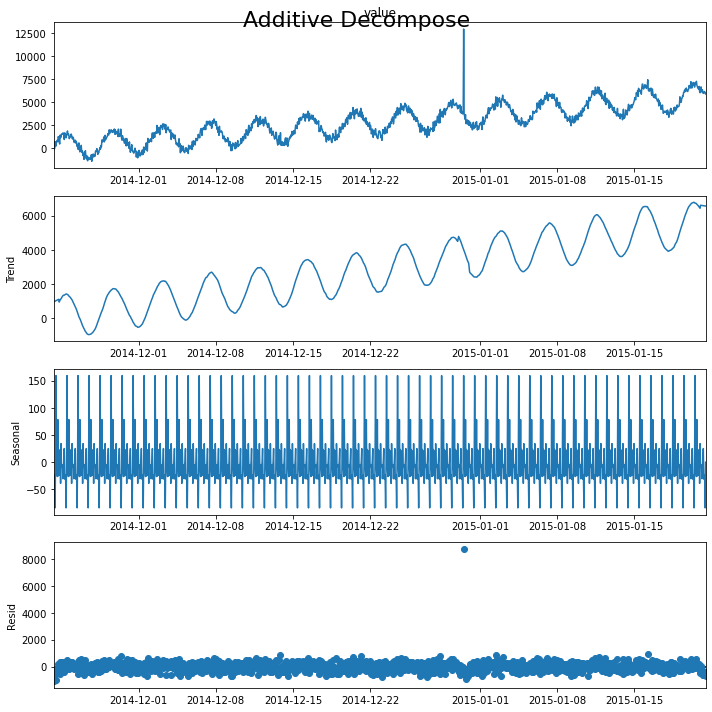



File: A2Benchmarksynthetic_27
threshold: 500
Outliers:
timestamp
2014-11-25 19:00:00     547.450670
2014-11-29 04:00:00     543.954187
2014-11-29 09:00:00     808.240910
2014-11-29 22:00:00     547.990314
2014-11-30 04:00:00     510.958322
2014-12-01 20:00:00     602.401001
2014-12-02 16:00:00     577.045630
2014-12-04 16:00:00     570.078018
2014-12-07 04:00:00     519.970908
2014-12-07 20:00:00     652.033357
2014-12-07 21:00:00     503.454056
2014-12-08 01:00:00     532.969908
2014-12-11 00:00:00     517.559418
2014-12-11 16:00:00     600.533456
2014-12-12 12:00:00     535.330507
2014-12-13 11:00:00     508.465800
2014-12-13 21:00:00     858.316805
2014-12-16 09:00:00     613.015504
2014-12-17 08:00:00     518.804732
2014-12-18 21:00:00     606.035447
2014-12-20 11:00:00     708.851679
2014-12-21 04:00:00     761.199711
2014-12-24 11:00:00     577.261613
2014-12-24 19:00:00     657.496567
2014-12-25 04:00:00     554.070489
2014-12-28 03:00:00     528.957605
2014-12-28 07:00:00    

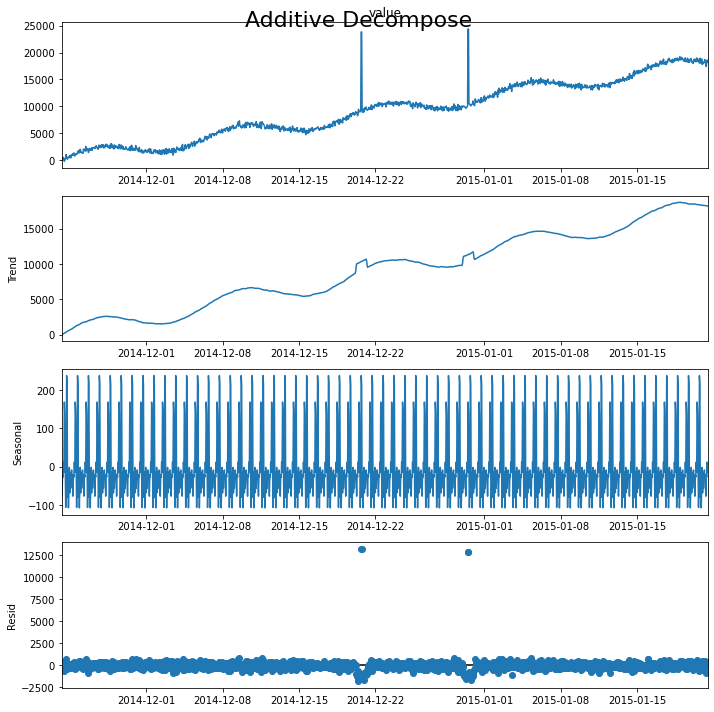



File: A2Benchmarksynthetic_28
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00      733.696088
2014-11-25 11:00:00      763.023418
2014-11-29 16:00:00      684.773270
2014-11-30 01:00:00      692.094102
2014-11-30 09:00:00      559.669203
2014-12-01 07:00:00      599.291925
2014-12-02 15:00:00      508.485578
2014-12-02 20:00:00      607.385130
2014-12-03 00:00:00      501.566847
2014-12-03 03:00:00      504.031142
2014-12-04 08:00:00      677.156019
2014-12-05 22:00:00      608.281826
2014-12-09 10:00:00      749.462802
2014-12-09 13:00:00      812.027728
2014-12-10 03:00:00      516.206885
2014-12-10 06:00:00      514.205830
2014-12-11 02:00:00      666.803711
2014-12-11 11:00:00      600.608167
2014-12-11 15:00:00      862.434161
2014-12-11 16:00:00      594.508552
2014-12-13 14:00:00      535.291403
2014-12-14 10:00:00      631.309041
2014-12-18 15:00:00      540.912138
2014-12-20 17:00:00    13238.232835
2014-12-20 18:00:00    13240.201666
2014-12-21 15:00:00      565.1799

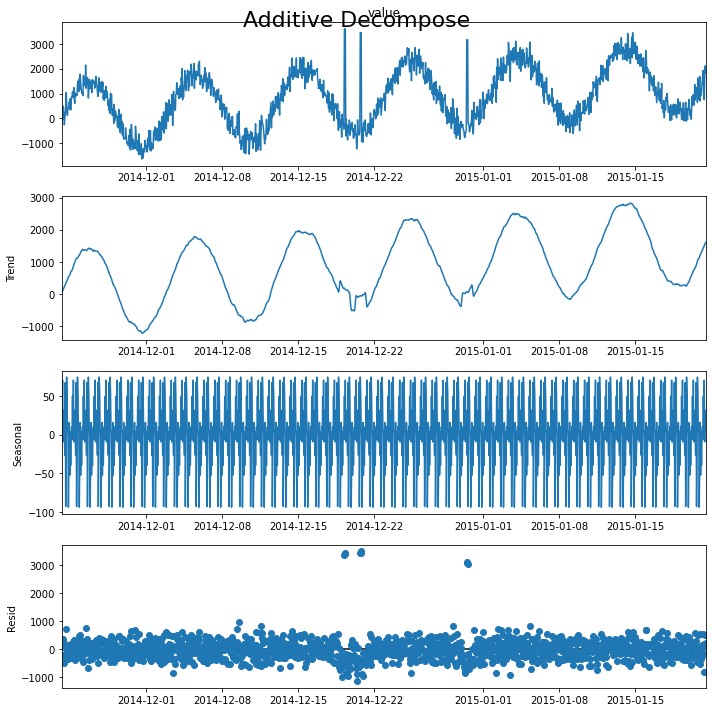



File: A2Benchmarksynthetic_29
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00    724.146516
2014-11-24 23:00:00    503.832489
2014-11-25 11:00:00    781.999790
2014-11-29 16:00:00    671.692031
2014-11-30 01:00:00    677.537136
                          ...    
2015-01-20 11:00:00    577.088336
2015-01-20 18:00:00    511.458008
2015-01-20 22:00:00    549.819676
2015-01-21 05:00:00    536.676871
2015-01-21 10:00:00    517.549910
Name: resid, Length: 70, dtype: float64



A4Benchmark_A2Benchmarksynthetic_3_add_STL


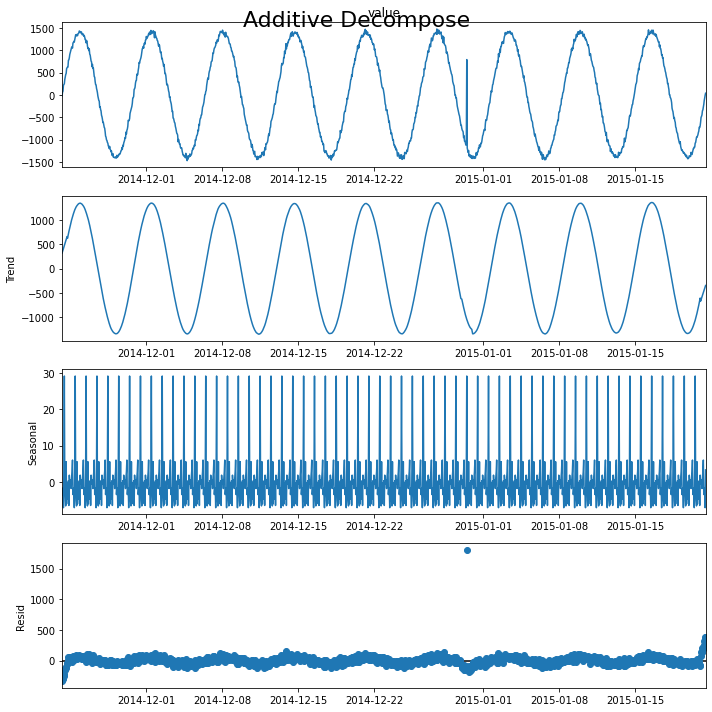



File: A2Benchmarksynthetic_3
threshold: 500
Outliers:
timestamp
2014-12-30 12:00:00    1810.40052
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_30_add_STL


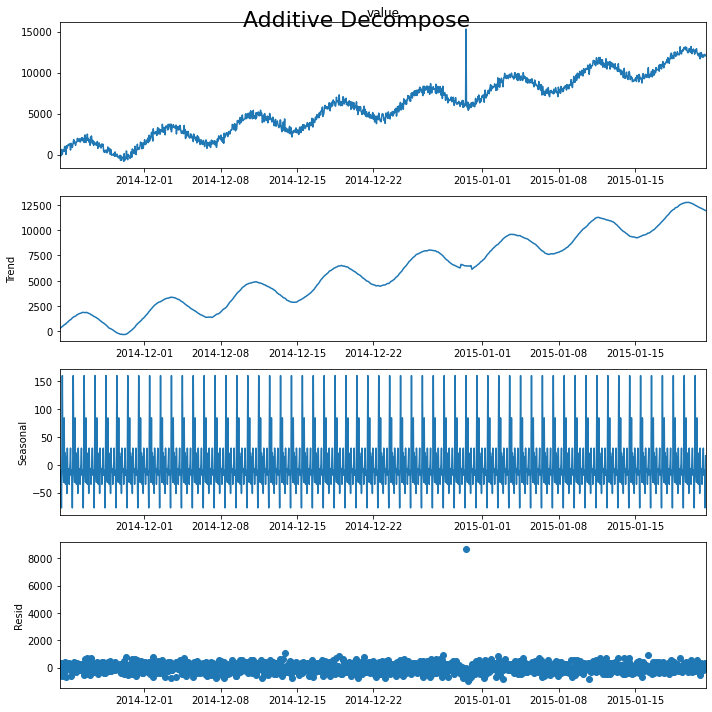



File: A2Benchmarksynthetic_30
threshold: 500
Outliers:
timestamp
2014-11-25 14:00:00    599.521416
2014-11-25 19:00:00    705.495365
2014-11-26 04:00:00    675.838168
2014-11-29 09:00:00    760.974505
2014-11-29 22:00:00    595.097335
                          ...    
2015-01-16 05:00:00    890.478879
2015-01-18 07:00:00    533.735800
2015-01-19 03:00:00    666.928410
2015-01-20 03:00:00    537.410591
2015-01-20 15:00:00    557.159894
Name: resid, Length: 70, dtype: float64



A4Benchmark_A2Benchmarksynthetic_31_add_STL


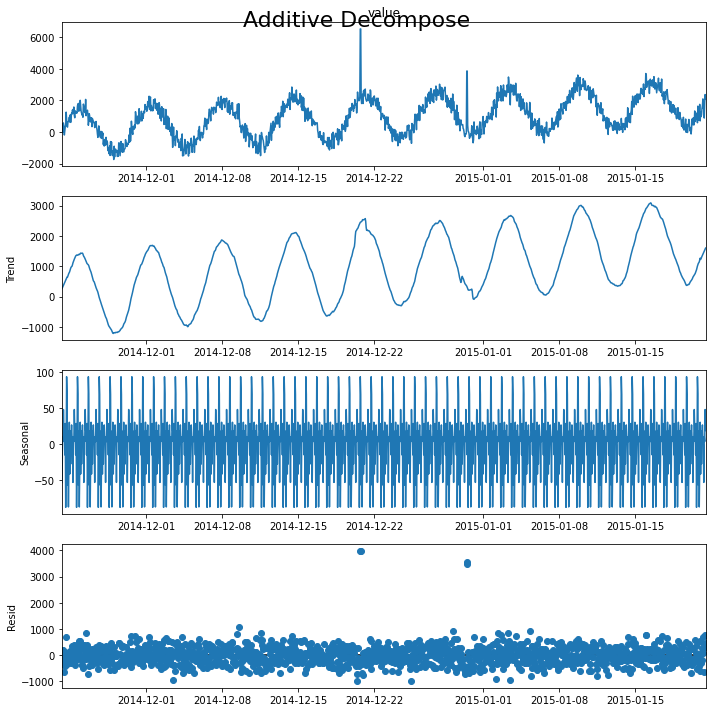



File: A2Benchmarksynthetic_31
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00    695.402954
2014-11-24 21:00:00    533.763801
2014-11-24 23:00:00    555.346939
2014-11-25 11:00:00    842.200788
2014-11-29 16:00:00    715.377927
                          ...    
2015-01-20 11:00:00    573.491698
2015-01-20 18:00:00    510.507829
2015-01-20 22:00:00    556.102376
2015-01-21 05:00:00    686.533489
2015-01-21 10:00:00    752.530505
Name: resid, Length: 79, dtype: float64



A4Benchmark_A2Benchmarksynthetic_32_add_STL


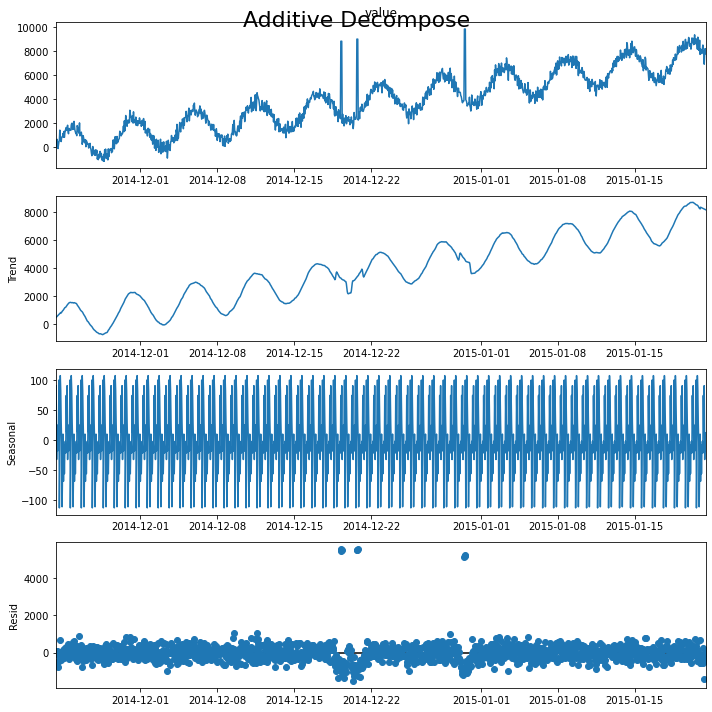



File: A2Benchmarksynthetic_32
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00    695.167035
2014-11-24 21:00:00    588.645884
2014-11-24 23:00:00    609.253891
2014-11-25 11:00:00    907.384691
2014-11-29 13:00:00    555.566537
                          ...    
2015-01-19 15:00:00    641.445497
2015-01-19 22:00:00    576.881565
2015-01-20 11:00:00    739.261297
2015-01-20 18:00:00    601.695207
2015-01-20 22:00:00    663.562695
Name: resid, Length: 99, dtype: float64



A4Benchmark_A2Benchmarksynthetic_33_add_STL


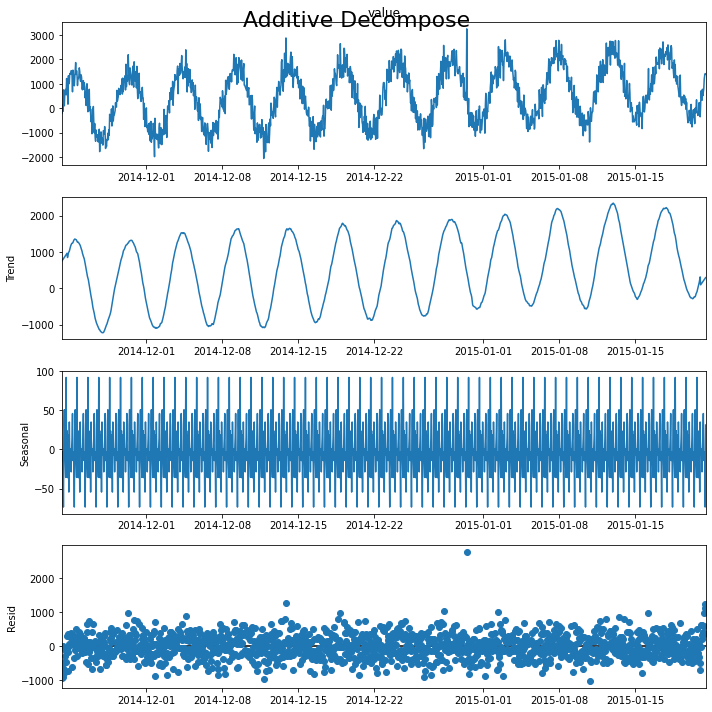



File: A2Benchmarksynthetic_33
threshold: 500
Outliers:
timestamp
2014-11-24 13:00:00     510.567146
2014-11-25 14:00:00     641.994514
2014-11-25 19:00:00     732.470055
2014-11-26 04:00:00     655.356685
2014-11-27 20:00:00     521.464316
                          ...     
2015-01-21 07:00:00     592.278918
2015-01-21 08:00:00     973.001399
2015-01-21 09:00:00    1102.453058
2015-01-21 10:00:00    1220.958898
2015-01-21 11:00:00    1072.931758
Name: resid, Length: 99, dtype: float64



A4Benchmark_A2Benchmarksynthetic_34_add_STL


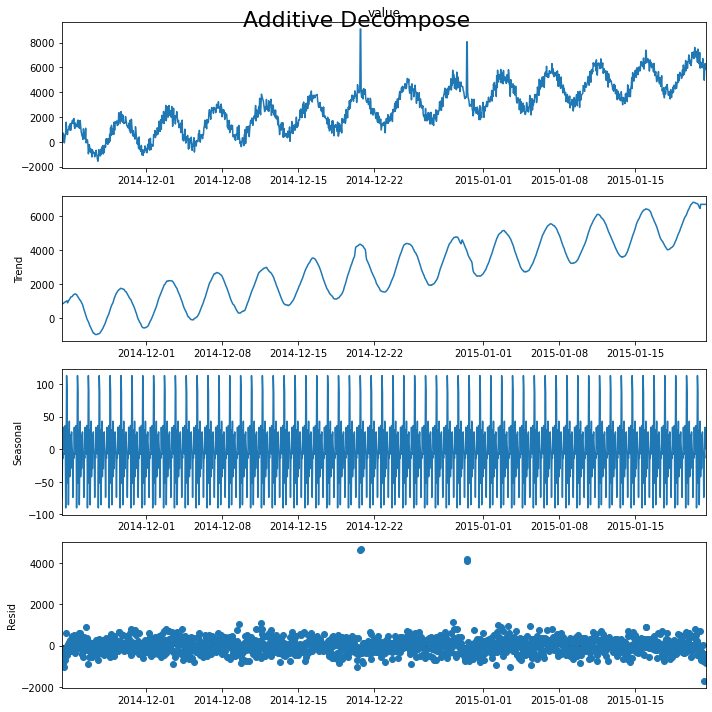



File: A2Benchmarksynthetic_34
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00    600.844712
2014-11-24 09:00:00    502.852877
2014-11-24 21:00:00    607.584511
2014-11-24 23:00:00    621.544601
2014-11-25 11:00:00    896.814294
                          ...    
2015-01-19 22:00:00    598.830476
2015-01-20 11:00:00    812.363889
2015-01-20 14:00:00    518.405623
2015-01-20 18:00:00    684.028728
2015-01-20 22:00:00    711.047690
Name: resid, Length: 101, dtype: float64



A4Benchmark_A2Benchmarksynthetic_35_add_STL


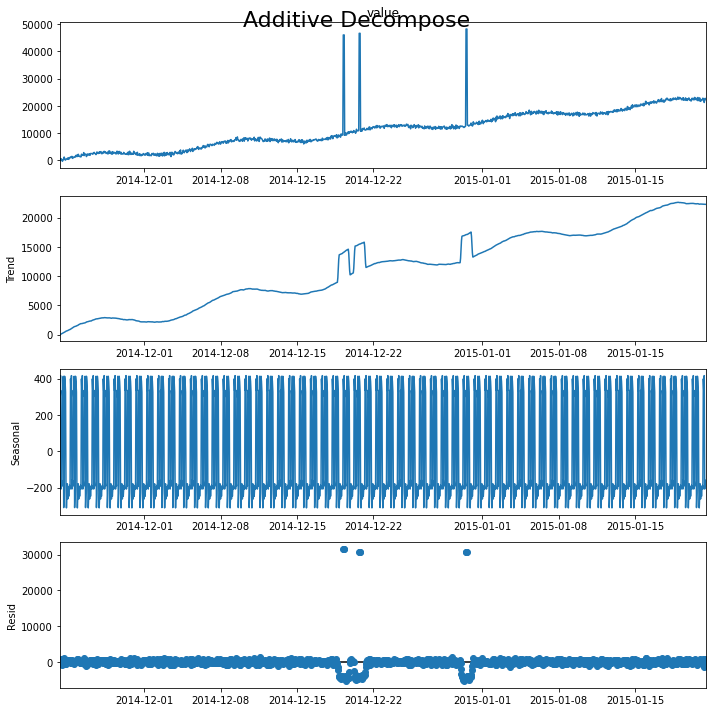



File: A2Benchmarksynthetic_35
threshold: 500
Outliers:
timestamp
2014-11-23 09:00:00     687.644734
2014-11-23 10:00:00     619.654956
2014-11-23 16:00:00    1096.396638
2014-11-24 09:00:00     596.737716
2014-11-24 21:00:00     765.360436
                          ...     
2015-01-20 05:00:00     554.266562
2015-01-20 11:00:00     915.780859
2015-01-20 22:00:00     873.908082
2015-01-21 05:00:00     740.440334
2015-01-21 10:00:00     646.952454
Name: resid, Length: 192, dtype: float64
Processing index: 30 of 100



A4Benchmark_A2Benchmarksynthetic_36_add_STL


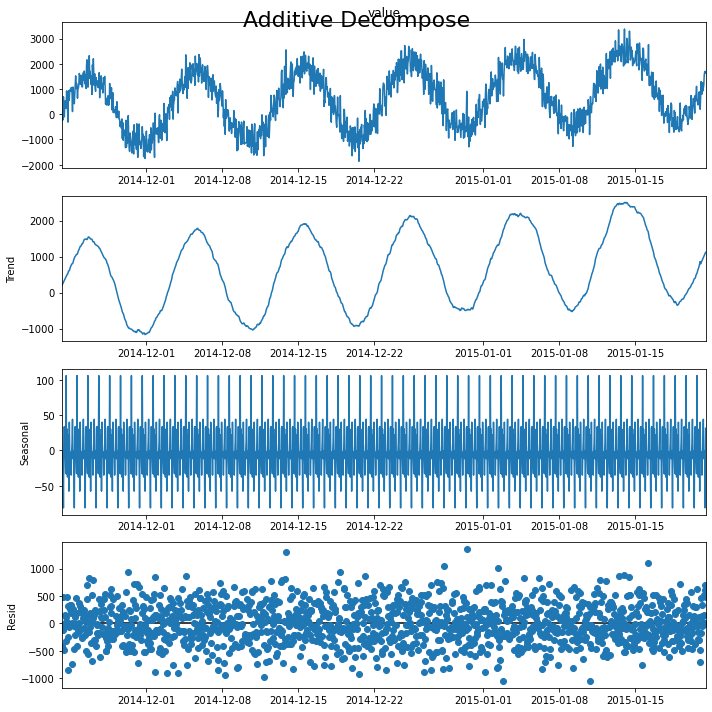



File: A2Benchmarksynthetic_36
threshold: 500
Outliers:
timestamp
2014-11-25 14:00:00    694.471686
2014-11-25 19:00:00    825.287534
2014-11-26 02:00:00    519.359067
2014-11-26 04:00:00    792.607138
2014-11-27 05:00:00    536.338228
                          ...    
2015-01-20 03:00:00    581.048749
2015-01-20 15:00:00    623.888986
2015-01-21 08:00:00    524.123126
2015-01-21 09:00:00    614.251371
2015-01-21 10:00:00    692.037916
Name: resid, Length: 126, dtype: float64



A4Benchmark_A2Benchmarksynthetic_37_add_STL


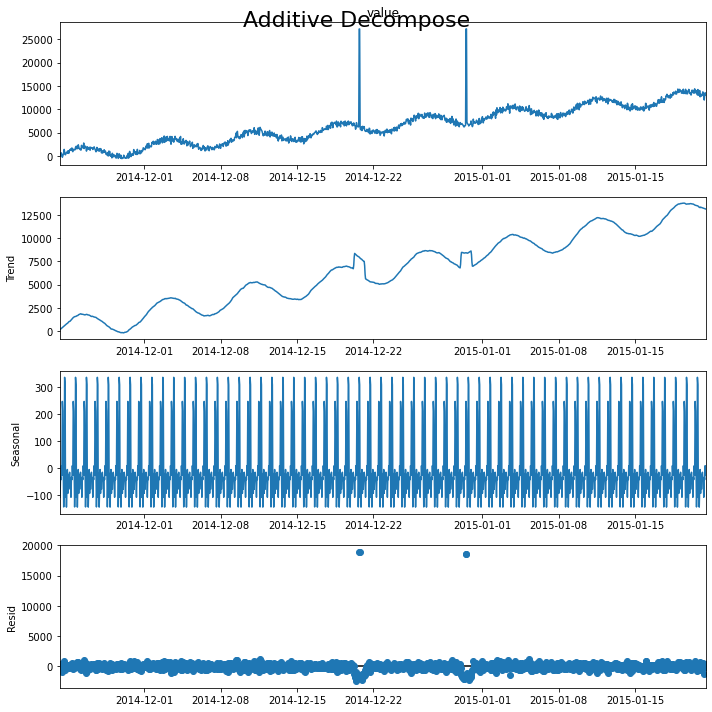



File: A2Benchmarksynthetic_37
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00    929.774061
2014-11-24 19:00:00    512.305216
2014-11-24 21:00:00    651.279604
2014-11-24 23:00:00    677.594085
2014-11-25 06:00:00    509.957526
                          ...    
2015-01-19 22:00:00    636.632650
2015-01-20 11:00:00    812.228463
2015-01-20 14:00:00    512.539600
2015-01-20 22:00:00    752.398160
2015-01-21 05:00:00    509.914500
Name: resid, Length: 146, dtype: float64



A4Benchmark_A2Benchmarksynthetic_38_add_STL


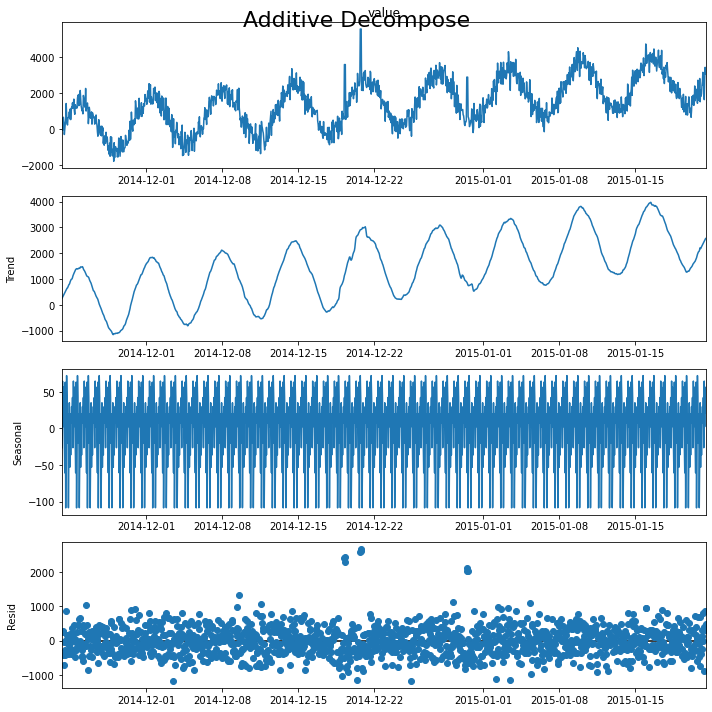



File: A2Benchmarksynthetic_38
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00     876.759543
2014-11-24 21:00:00     644.409698
2014-11-24 23:00:00     670.831236
2014-11-25 11:00:00    1024.164900
2014-11-27 18:00:00     518.180151
                          ...     
2015-01-20 11:00:00     715.132708
2015-01-20 18:00:00     675.253895
2015-01-20 22:00:00     689.540316
2015-01-21 05:00:00     799.570935
2015-01-21 10:00:00     850.957905
Name: resid, Length: 141, dtype: float64



A4Benchmark_A2Benchmarksynthetic_39_add_STL


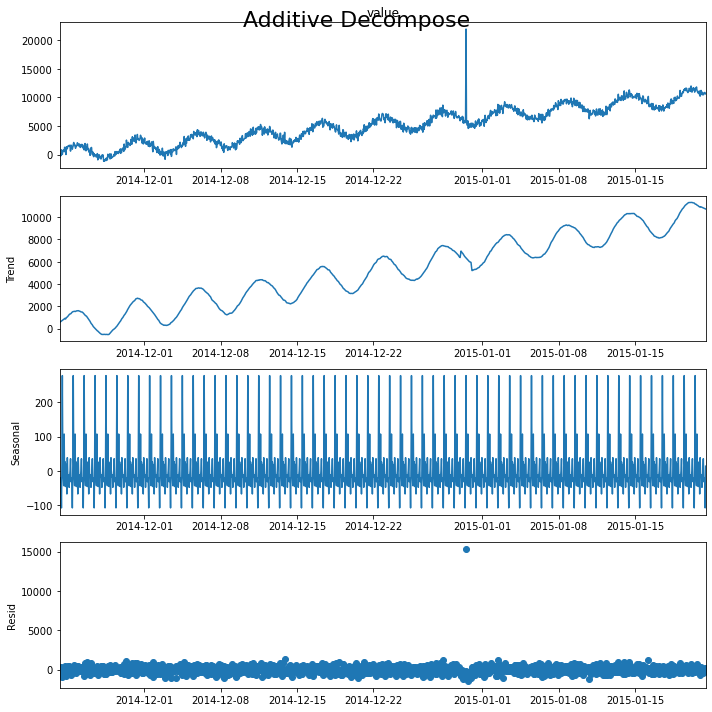



File: A2Benchmarksynthetic_39
threshold: 500
Outliers:
timestamp
2014-11-24 13:00:00    564.076347
2014-11-25 13:00:00    505.312729
2014-11-25 14:00:00    774.585421
2014-11-25 19:00:00    898.090833
2014-11-26 02:00:00    549.089155
                          ...    
2015-01-18 14:00:00    503.276138
2015-01-19 03:00:00    859.796143
2015-01-19 15:00:00    572.029943
2015-01-20 03:00:00    730.217671
2015-01-20 15:00:00    753.884890
Name: resid, Length: 148, dtype: float64



A4Benchmark_A2Benchmarksynthetic_4_add_STL


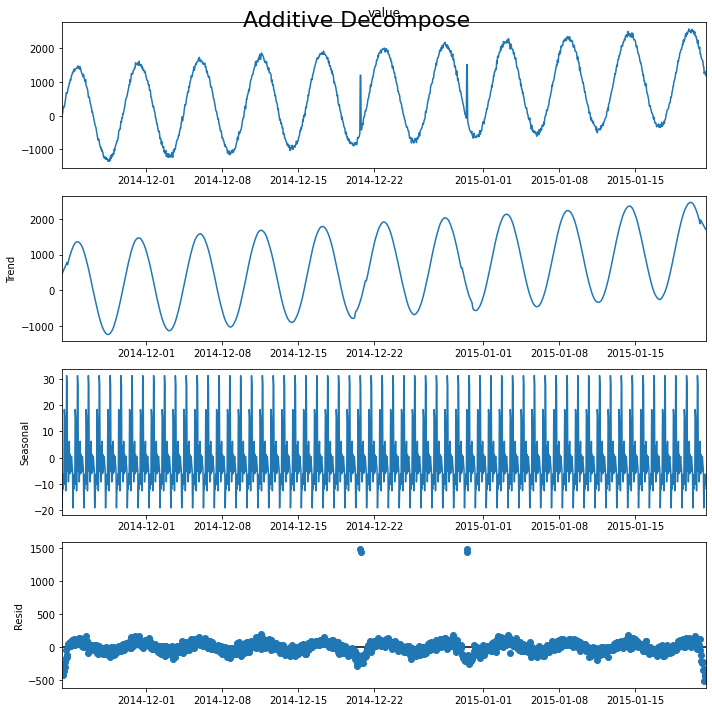



File: A2Benchmarksynthetic_4
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1477.393258
2014-12-20 18:00:00    1440.353492
2014-12-30 12:00:00    1431.164829
2014-12-30 13:00:00    1482.221047
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_40_add_STL


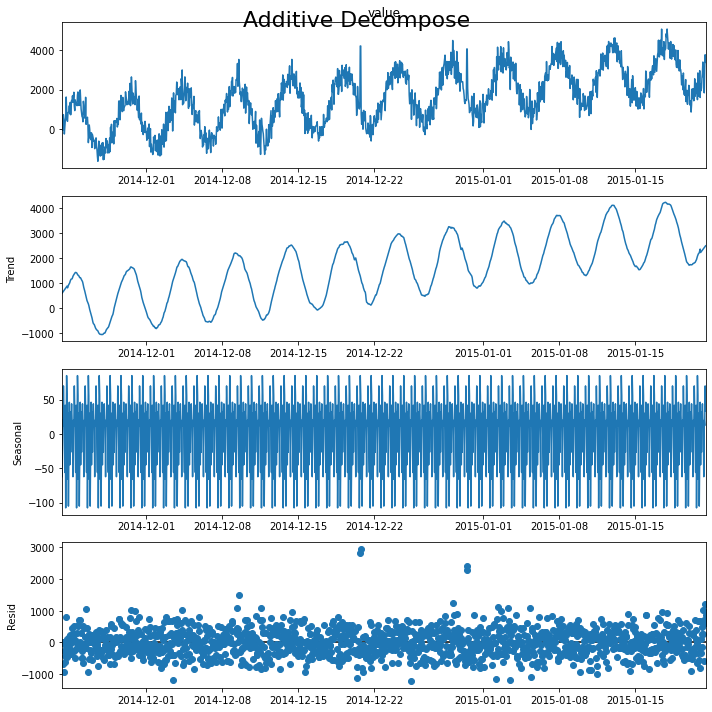



File: A2Benchmarksynthetic_40
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00     815.984690
2014-11-24 09:00:00     516.622453
2014-11-24 18:00:00     506.219570
2014-11-24 19:00:00     551.924920
2014-11-24 21:00:00     697.489269
                          ...     
2015-01-21 05:00:00    1028.898609
2015-01-21 07:00:00     716.873820
2015-01-21 09:00:00     627.569807
2015-01-21 10:00:00    1225.297907
2015-01-21 11:00:00     856.651039
Name: resid, Length: 158, dtype: float64



A4Benchmark_A2Benchmarksynthetic_41_add_STL


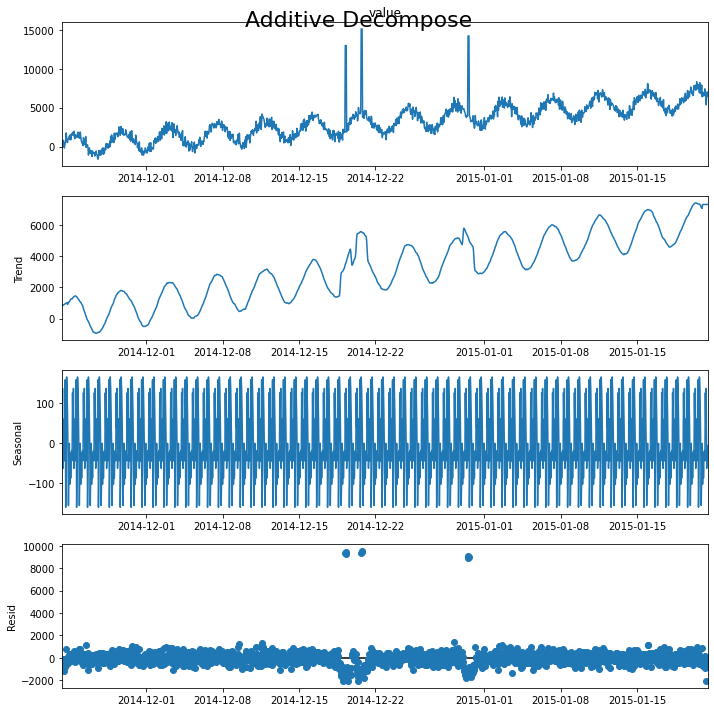



File: A2Benchmarksynthetic_41
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00     831.001718
2014-11-24 09:00:00     628.762881
2014-11-24 21:00:00     767.030826
2014-11-24 23:00:00     785.829315
2014-11-25 11:00:00    1126.765137
                          ...     
2015-01-19 23:00:00     524.703575
2015-01-20 05:00:00     555.906425
2015-01-20 11:00:00    1001.991629
2015-01-20 18:00:00     776.324852
2015-01-20 22:00:00     893.286047
Name: resid, Length: 164, dtype: float64



A4Benchmark_A2Benchmarksynthetic_42_add_STL


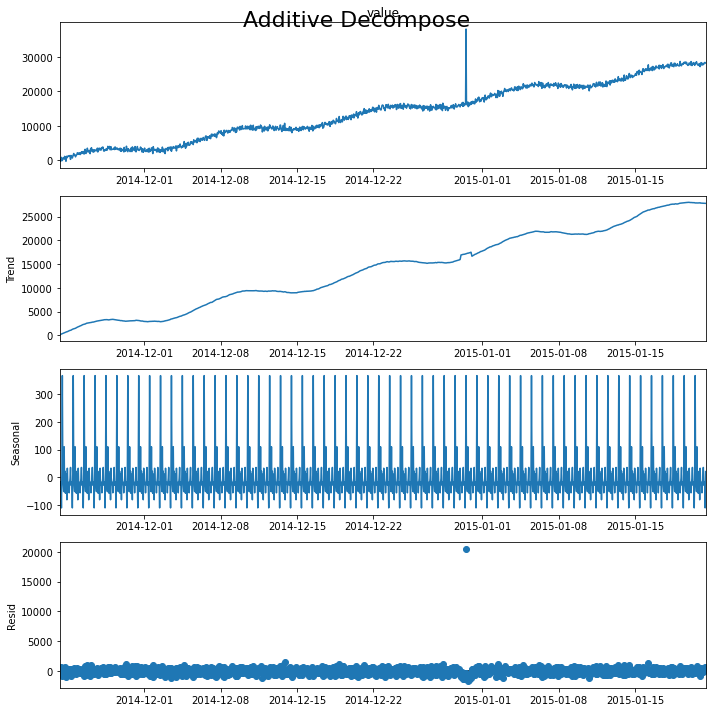



File: A2Benchmarksynthetic_42
threshold: 500
Outliers:
timestamp
2014-11-23 10:00:00    639.164609
2014-11-23 17:00:00    595.966248
2014-11-24 13:00:00    542.509659
2014-11-25 13:00:00    513.785201
2014-11-25 14:00:00    807.340042
                          ...    
2015-01-20 03:00:00    721.345319
2015-01-20 15:00:00    759.787854
2015-01-21 01:00:00    507.404572
2015-01-21 09:00:00    575.313708
2015-01-21 10:00:00    652.981216
Name: resid, Length: 175, dtype: float64



A4Benchmark_A2Benchmarksynthetic_43_add_STL


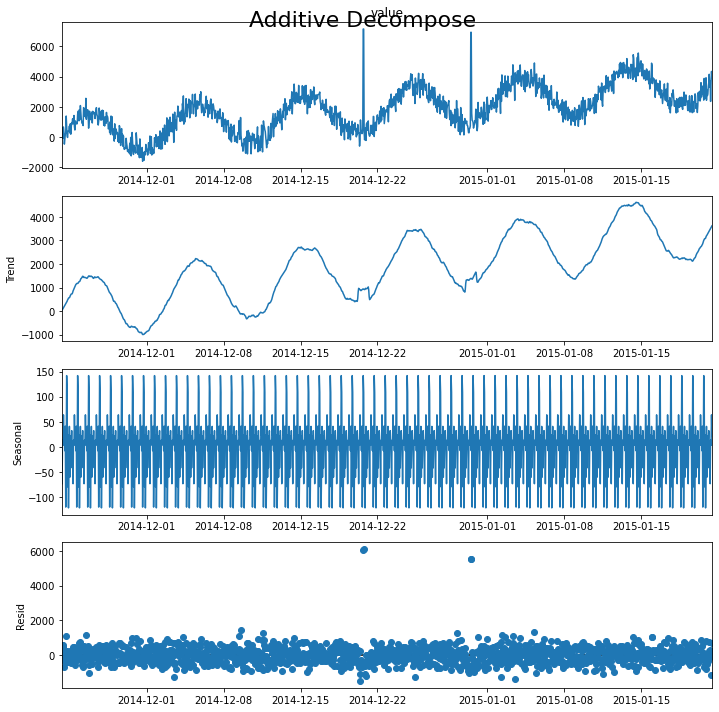



File: A2Benchmarksynthetic_43
threshold: 500
Outliers:
timestamp
2014-11-23 07:00:00     584.370059
2014-11-23 09:00:00     546.871861
2014-11-23 16:00:00    1070.788311
2014-11-24 19:00:00     527.095270
2014-11-24 21:00:00     688.294972
                          ...     
2015-01-20 14:00:00     506.791751
2015-01-20 18:00:00     730.721975
2015-01-20 22:00:00     800.624173
2015-01-21 05:00:00     746.680381
2015-01-21 10:00:00     698.604047
Name: resid, Length: 175, dtype: float64



A4Benchmark_A2Benchmarksynthetic_44_add_STL


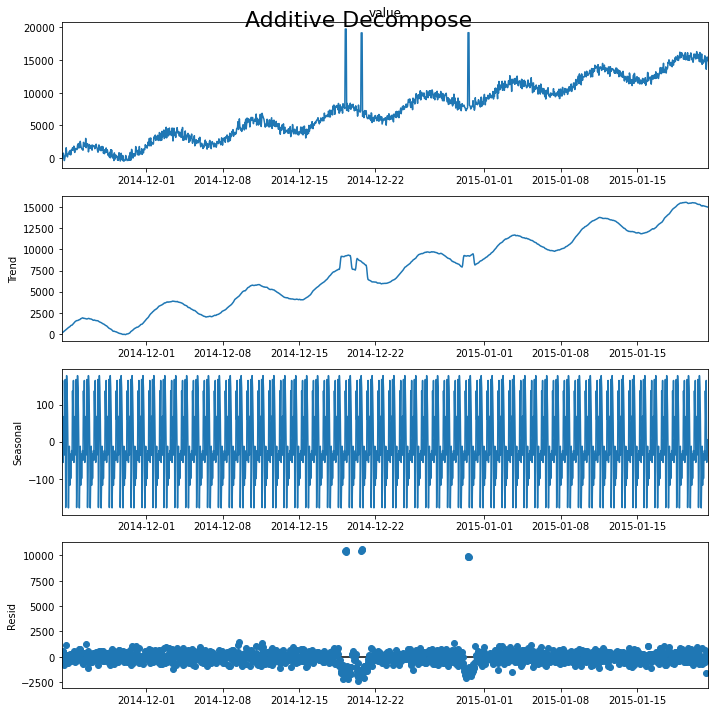



File: A2Benchmarksynthetic_44
threshold: 500
Outliers:
timestamp
2014-11-23 09:00:00     545.771147
2014-11-23 16:00:00    1122.019142
2014-11-24 09:00:00     564.756951
2014-11-24 21:00:00     772.813994
2014-11-24 23:00:00     803.966873
                          ...     
2015-01-20 05:00:00     507.078102
2015-01-20 11:00:00     964.573491
2015-01-20 18:00:00     744.123063
2015-01-20 22:00:00     896.724592
2015-01-21 05:00:00     633.840438
Name: resid, Length: 188, dtype: float64
Processing index: 40 of 100



A4Benchmark_A2Benchmarksynthetic_45_add_STL


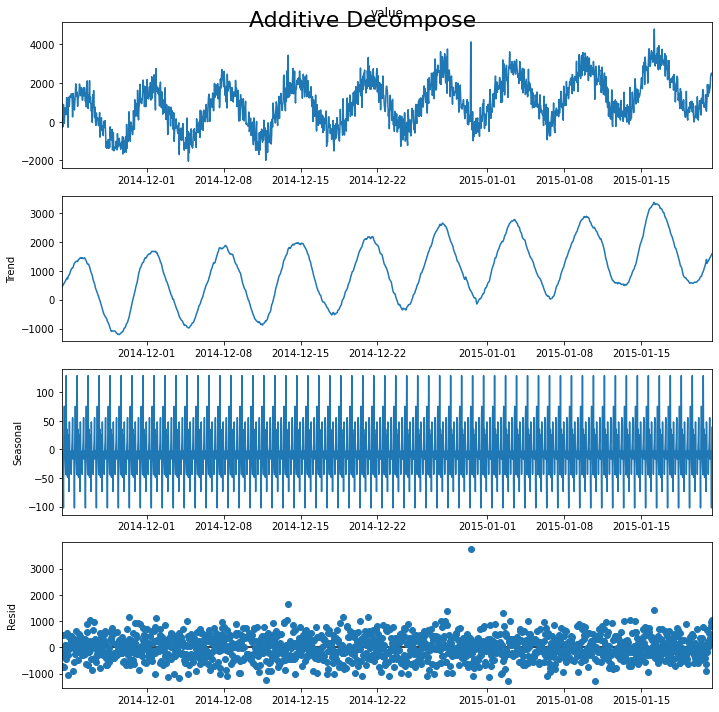



File: A2Benchmarksynthetic_45
threshold: 500
Outliers:
timestamp
2014-11-23 17:00:00     558.567349
2014-11-24 13:00:00     611.958240
2014-11-24 21:00:00     501.897758
2014-11-25 13:00:00     571.717605
2014-11-25 14:00:00     884.579818
                          ...     
2015-01-21 04:00:00     530.715808
2015-01-21 08:00:00     819.966749
2015-01-21 09:00:00     947.788720
2015-01-21 10:00:00    1060.303311
2015-01-21 11:00:00     809.453449
Name: resid, Length: 194, dtype: float64



A4Benchmark_A2Benchmarksynthetic_46_add_STL


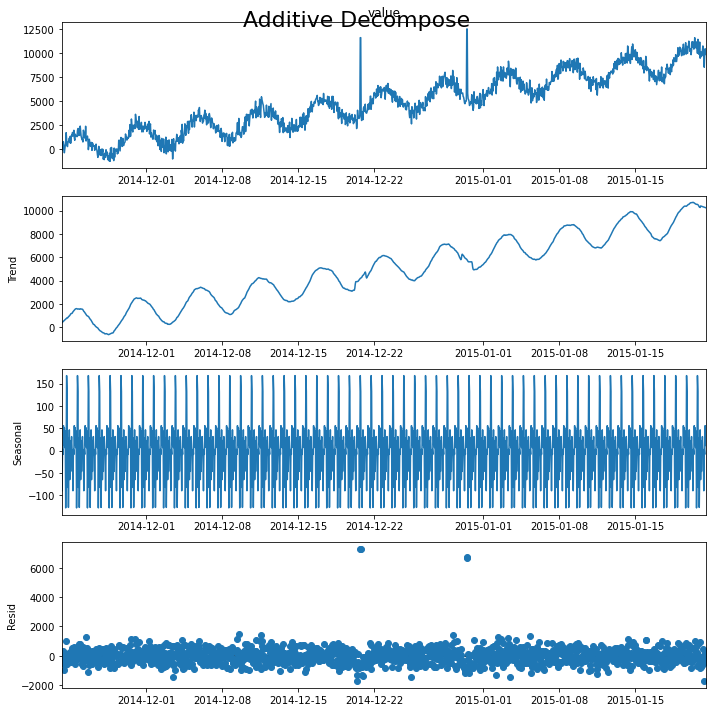



File: A2Benchmarksynthetic_46
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00    1030.105627
2014-11-24 06:00:00     519.531460
2014-11-24 09:00:00     578.146842
2014-11-24 19:00:00     611.484888
2014-11-24 21:00:00     782.163093
                          ...     
2015-01-20 07:00:00     544.344672
2015-01-20 11:00:00     995.234799
2015-01-20 14:00:00     615.093961
2015-01-20 18:00:00     827.520111
2015-01-20 22:00:00     902.663988
Name: resid, Length: 198, dtype: float64



A4Benchmark_A2Benchmarksynthetic_47_add_STL


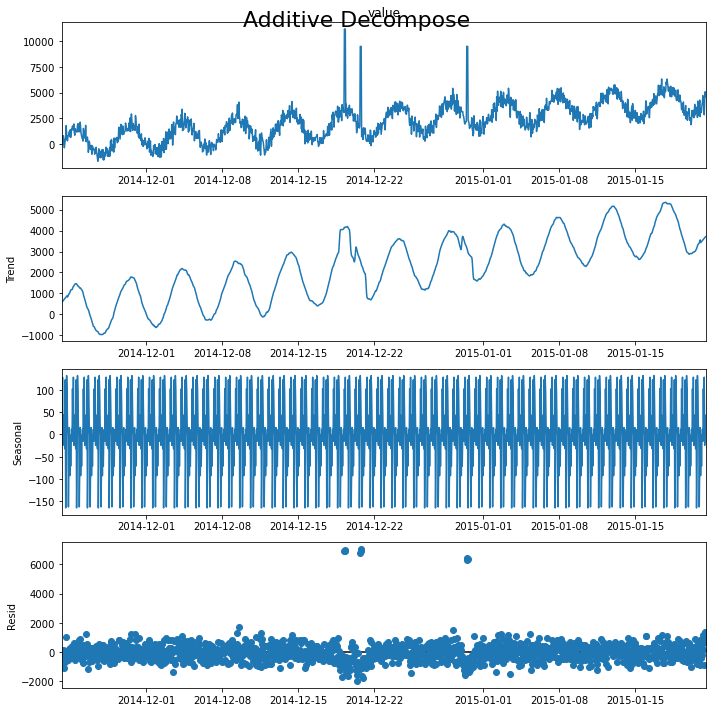



File: A2Benchmarksynthetic_47
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00    1032.698936
2014-11-24 09:00:00     629.314099
2014-11-24 18:00:00     547.328256
2014-11-24 19:00:00     533.539818
2014-11-24 21:00:00     843.492823
                          ...     
2015-01-21 05:00:00    1177.293712
2015-01-21 07:00:00     665.208040
2015-01-21 09:00:00     665.956233
2015-01-21 10:00:00    1358.493680
2015-01-21 11:00:00     915.924549
Name: resid, Length: 201, dtype: float64



A4Benchmark_A2Benchmarksynthetic_48_add_STL


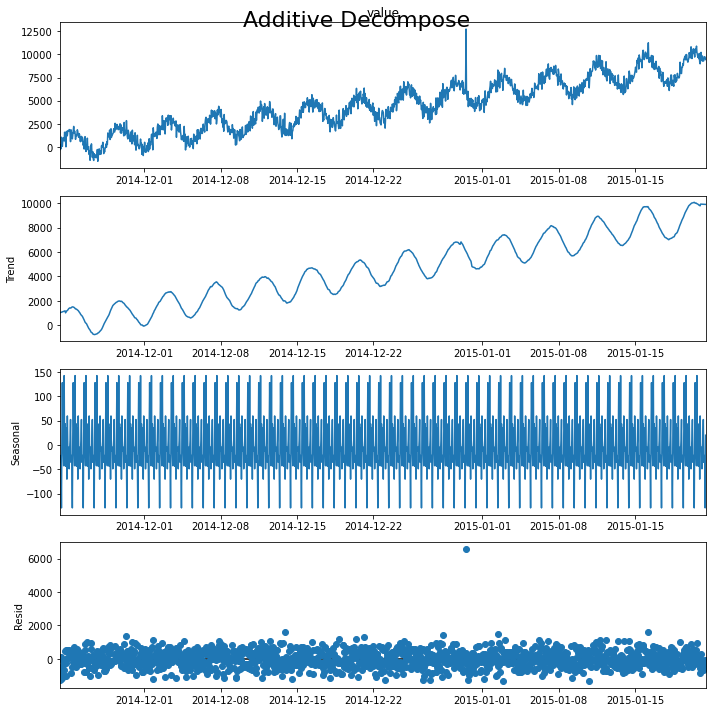



File: A2Benchmarksynthetic_48
threshold: 500
Outliers:
timestamp
2014-11-24 00:00:00    524.772030
2014-11-24 03:00:00    548.238793
2014-11-24 13:00:00    711.876306
2014-11-24 21:00:00    560.445236
2014-11-25 13:00:00    550.009359
                          ...    
2015-01-19 17:00:00    591.090611
2015-01-20 03:00:00    910.917408
2015-01-20 08:00:00    585.223799
2015-01-20 14:00:00    530.803266
2015-01-20 15:00:00    955.451782
Name: resid, Length: 229, dtype: float64



A4Benchmark_A2Benchmarksynthetic_49_add_STL


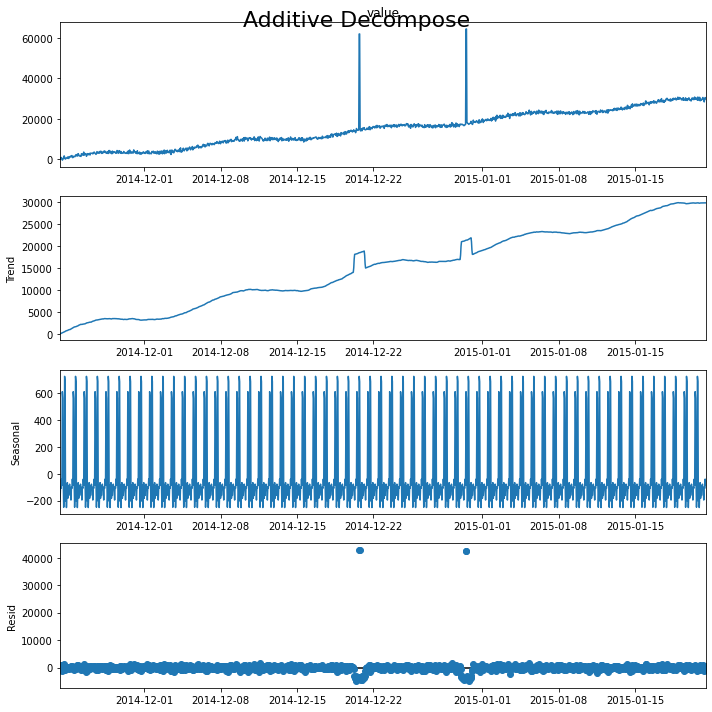



File: A2Benchmarksynthetic_49
threshold: 500
Outliers:
timestamp
2014-11-23 07:00:00     848.486388
2014-11-23 09:00:00     795.332456
2014-11-23 10:00:00     698.890895
2014-11-23 16:00:00    1355.584086
2014-11-24 06:00:00     602.179034
                          ...     
2015-01-20 11:00:00    1097.273105
2015-01-20 14:00:00     709.066677
2015-01-20 22:00:00    1037.258231
2015-01-21 05:00:00     862.989495
2015-01-21 10:00:00     742.017482
Name: resid, Length: 256, dtype: float64



A4Benchmark_A2Benchmarksynthetic_5_add_STL


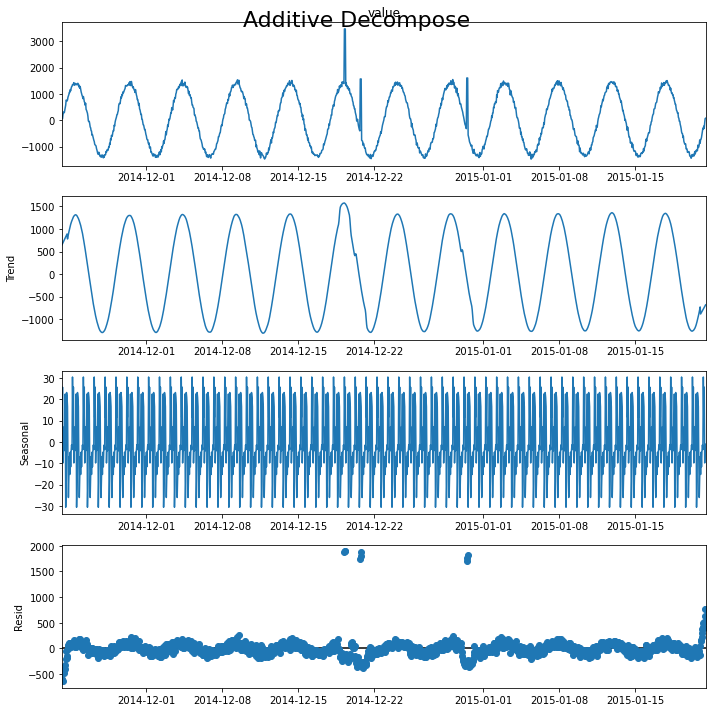



File: A2Benchmarksynthetic_5
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    1868.993001
2014-12-19 07:00:00    1896.553209
2014-12-19 08:00:00    1893.219015
2014-12-20 17:00:00    1740.476241
2014-12-20 18:00:00    1809.225018
2014-12-20 19:00:00    1878.092991
2014-12-30 12:00:00    1699.897423
2014-12-30 13:00:00    1770.025922
2014-12-30 14:00:00    1819.031204
2015-01-21 07:00:00     522.873082
2015-01-21 09:00:00     639.356861
2015-01-21 10:00:00     763.038227
2015-01-21 11:00:00     764.002672
Name: resid, dtype: float64



A4Benchmark_A2Benchmarksynthetic_50_add_STL


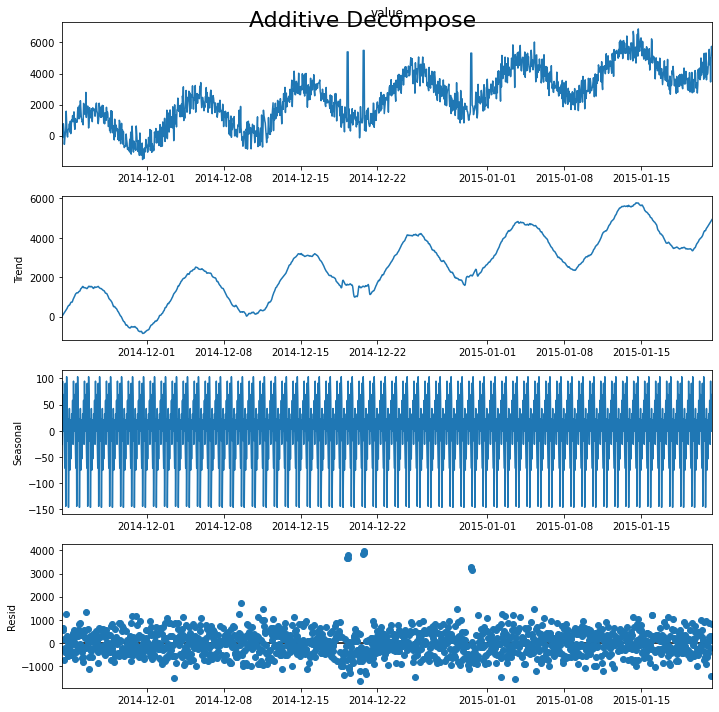



File: A2Benchmarksynthetic_50
threshold: 500
Outliers:
timestamp
2014-11-23 07:00:00     635.984672
2014-11-23 09:00:00     654.287127
2014-11-23 10:00:00     559.941878
2014-11-23 16:00:00    1254.867269
2014-11-24 09:00:00     562.481699
                          ...     
2015-01-20 14:00:00     548.279434
2015-01-20 18:00:00     912.840682
2015-01-20 22:00:00     936.784481
2015-01-21 05:00:00     862.440195
2015-01-21 10:00:00     799.707965
Name: resid, Length: 231, dtype: float64



A4Benchmark_A2Benchmarksynthetic_51_add_STL


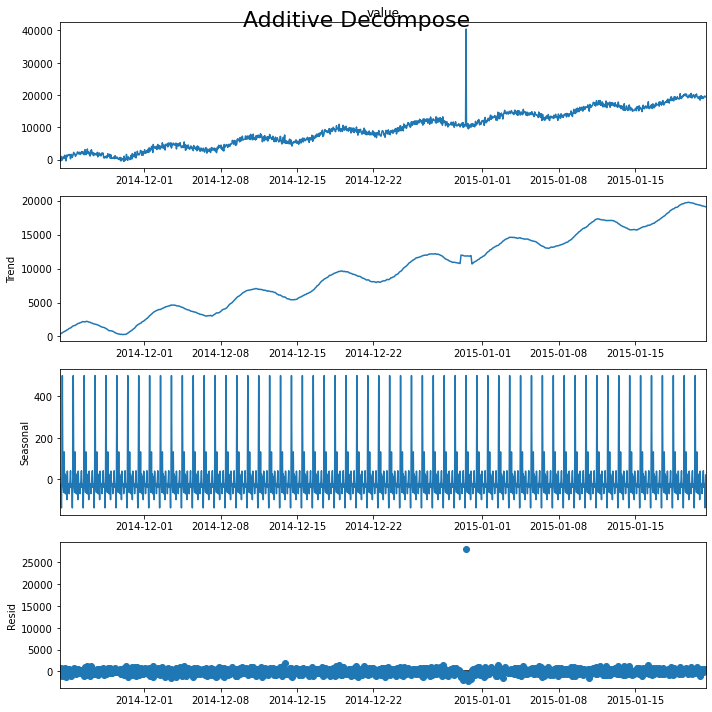



File: A2Benchmarksynthetic_51
threshold: 500
Outliers:
timestamp
2014-11-23 10:00:00    676.371652
2014-11-23 17:00:00    689.358572
2014-11-24 03:00:00    506.978697
2014-11-24 13:00:00    682.525556
2014-11-24 21:00:00    559.409149
                          ...    
2015-01-20 08:00:00    527.310219
2015-01-20 15:00:00    940.542984
2015-01-21 01:00:00    571.738907
2015-01-21 09:00:00    571.959727
2015-01-21 10:00:00    654.831192
Name: resid, Length: 244, dtype: float64



A4Benchmark_A2Benchmarksynthetic_52_add_STL


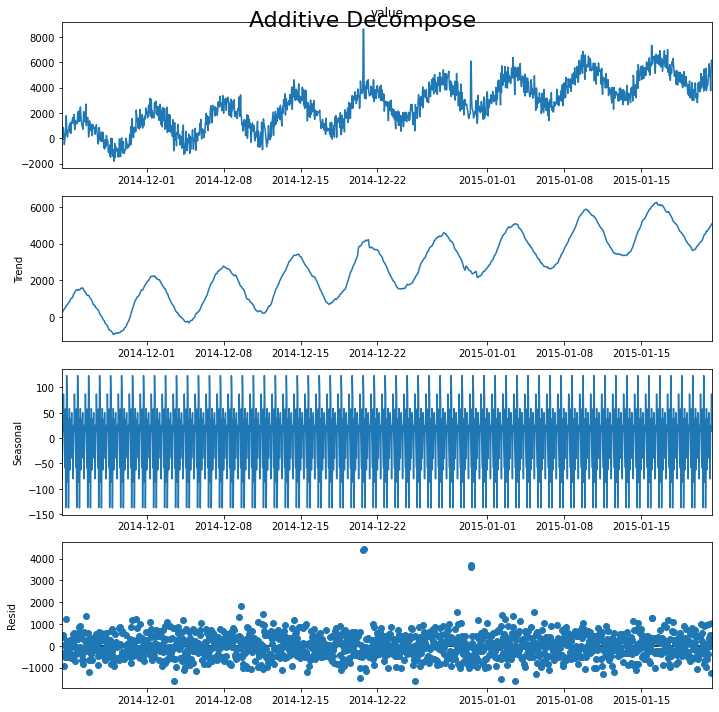



File: A2Benchmarksynthetic_52
threshold: 500
Outliers:
timestamp
2014-11-23 07:00:00     506.589765
2014-11-23 16:00:00    1225.061926
2014-11-24 06:00:00     541.264906
2014-11-24 09:00:00     600.241797
2014-11-24 18:00:00     583.070001
                          ...     
2015-01-20 22:00:00     942.005399
2015-01-21 05:00:00    1011.235031
2015-01-21 07:00:00     508.292044
2015-01-21 10:00:00    1033.644576
2015-01-21 11:00:00     508.991615
Name: resid, Length: 235, dtype: float64



A4Benchmark_A2Benchmarksynthetic_53_add_STL


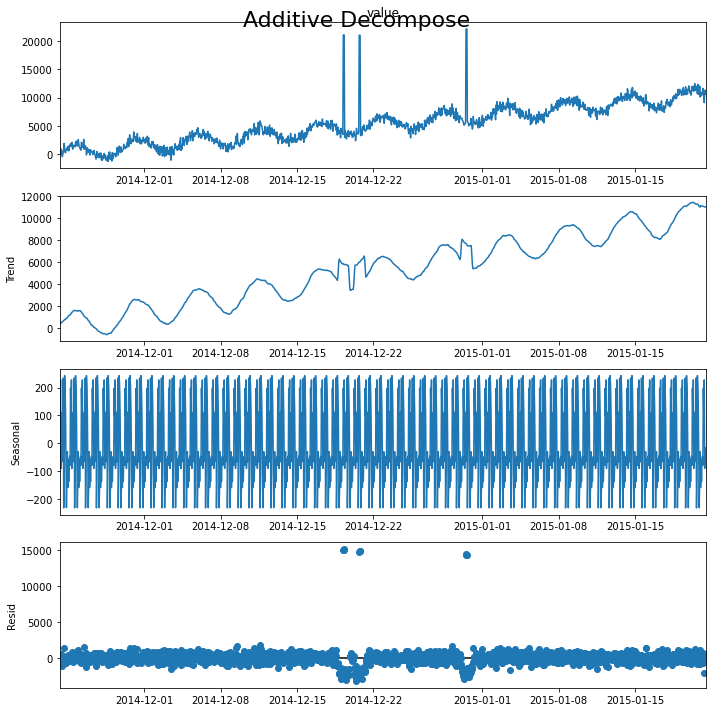



File: A2Benchmarksynthetic_53
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00    1292.259731
2014-11-24 09:00:00     735.519884
2014-11-24 21:00:00     973.606505
2014-11-24 23:00:00    1008.729710
2014-11-25 11:00:00    1505.418280
                          ...     
2015-01-20 11:00:00    1216.325577
2015-01-20 14:00:00     516.023441
2015-01-20 18:00:00     896.227140
2015-01-20 22:00:00    1116.899443
2015-01-21 05:00:00     631.487828
Name: resid, Length: 245, dtype: float64
Processing index: 50 of 100



A4Benchmark_A2Benchmarksynthetic_54_add_STL


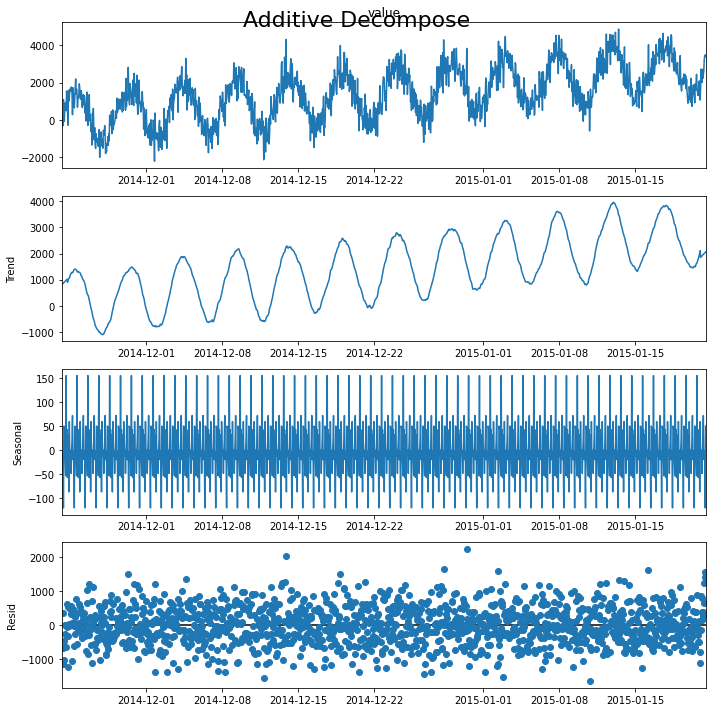



File: A2Benchmarksynthetic_54
threshold: 500
Outliers:
timestamp
2014-11-23 17:00:00     604.380807
2014-11-23 21:00:00     527.980446
2014-11-24 00:00:00     550.088727
2014-11-24 03:00:00     568.568740
2014-11-24 13:00:00     769.366452
                          ...     
2015-01-21 07:00:00     636.688121
2015-01-21 08:00:00    1224.970555
2015-01-21 09:00:00    1402.172753
2015-01-21 10:00:00    1561.219287
2015-01-21 11:00:00    1284.496258
Name: resid, Length: 267, dtype: float64
STL Additive decomposition of Yahoo S5 A4 Benchmark processing complete. Time taken:0:00:35.145123


In [35]:
a4_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark/A4Benchmark-TS*.csv', recursive=True)
start_time = datetime.now() 
for index,file in enumerate(all_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 50:
         break
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A4Benchmark_" + fname +"_add_STL")
    print("\n\n\nA4Benchmark_" + fname +"_add_STL")
    plt.show()
    threshold=500
    residualdf = result_add.resid
    outliers = residualdf[residualdf > threshold]
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Outliers:")
    print(outliers)
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A4 Benchmark processing complete. Time taken:{end_time-start_time}")

# Extracting useful features from Time-Series

it is possible to use and derive various features from time-series. we can use these features to compare time series and post-comparison: we can detect any anomalous records/subsequences.

![Image of Features](./img/features.png)

References 78 and 79 deal with this: 78 offers a comparison between time series using a combination of PCA on the abovementioned features and then uses a multidimensional outlier detection 

to be able to incorporate these features, we must first extract them. acc to the authors of [78], their code included on open source R package on CRAM to automatically extract all the abovementioned features. We can use this library in python via the rpy2 package 

In [36]:
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter

C:\Users\Sanke\anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [37]:
import rpy2
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter

def extract_features(timeseries):
    try:
        oddstream=importr('oddstream')
    except:
        ro.r(f'install.packages("oddstream")')
        oddstream = importr('oddstream')

    #r_timeseries = pandas2ri.py2ri(timeseries)
    with localconverter(ro.default_converter + pandas2ri.converter):
        for col in timeseries.columns.values:
            timeseries[col]=timeseries[col].astype(str) 
        #r_timeseries = ro.conversion.py2rpy(timeseries)
        features=oddstream.extract_tsfeatures(timeseries)
        #features= ro.conversion.rpy2py(features)
        return features
    return []


In [38]:
df_indexed

value  is_anomaly
timestamp                                   
2014-11-23 07:00:00  -336.894181           0
2014-11-23 08:00:00   177.687052           0
2014-11-23 09:00:00  -297.629814           0
2014-11-23 10:00:00  1093.183161           0
2014-11-23 11:00:00   483.465000           0
...                          ...         ...
2015-01-21 07:00:00  2602.928866           0
2015-01-21 08:00:00  3227.535045           0
2015-01-21 09:00:00  3413.478648           0
2015-01-21 10:00:00  3484.146823           0
2015-01-21 11:00:00  3396.296256           0

[1421 rows x 2 columns]

In [39]:
features = extract_features(df_indexed)
print(features)

             mean     variance    lumpiness   lshift   vchange    linearity

[1,] 1.428809e+03 1.844373e+06 2.440609e+10 1354.167 1122987.8 2.850841e+04

[2,] 7.037298e-04 7.037298e-04 7.042254e-05    0.100       0.1 1.183452e-02

         curvature    spikiness BurstinessFF   minimum  maximum rmeaniqmean

[1,]  5.199530e+02 9.323638e+05     1290.846 -2204.039 4863.886   0.9792109

[2,] -6.221385e-08 3.483166e-10        1.000     0.000    1.000   0.0000000

          moment3   highlowmu

[1,] 7.955550e+06    1.038737

[2,] 2.652791e-02 1420.000000

attr(,"class")

[1] "features" "matrix"  



This matrix contains all the needed values except Season, Peak, Trough, and Trend. We can try to get these 

In [40]:
type(features)

rpy2.robjects.vectors.Matrix

In [41]:
tsfeatures1  = pandas2ri.ri2py(features)
tsfeatures1

array([[ 1.42880933e+03,  1.84437297e+06,  2.44060856e+10,
         1.35416710e+03,  1.12298783e+06,  2.85084057e+04,
         5.19953035e+02,  9.32363844e+05,  1.29084611e+03,
        -2.20403927e+03,  4.86388619e+03,  9.79210876e-01,
         7.95554960e+06,  1.03873745e+00],
       [ 7.03729768e-04,  7.03729768e-04,  7.04225352e-05,
         1.00000000e-01,  1.00000000e-01,  1.18345215e-02,
        -6.22138484e-08,  3.48316611e-10,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         2.65279055e-02,  1.42000000e+03]])

In the above array, the first row contains the values for the value column, and the second for the is_anomaly column

In [42]:
type(pandas2ri.ri2py(features))

numpy.ndarray

In [43]:
tsfeatures1[0,0]

1428.8093301961653

In [48]:
result_add